# Ödev 2 #
## Teslim Tarihi: 02 Nisan 2024, Salı 09:30 ##
## Ad Soyad: Korhan Kara ##
## Numara: 23810105 ##

Size verilen veritabanlarını `astroquery` 'nin ilgili alt modül ve fonksiyonlarını kullanarak 10 örnek sorgu üretiniz. Sorgularınızla neleri elde etmeyi amaçladığınızı ve sorgularınızın sonuç olarak ne yaptığını oluşturacağınız Jupyter defterinde açıklamalı olarak anlatınız.

Her bir öğrenci çalışma alanına uygun kendi istediği bir veritabanını seçebilir. Sorguların işinize yarar, kullanılabilir bilgiler döndüren sorgular olmasına özen gösteriniz. 

In [3]:
#Dosya boyunca kullanılan tüm kütüphaneler tanımlandı.

from astroquery.simbad import Simbad
import matplotlib.pyplot as plt
from astropy.time import Time
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import solar_system_ephemeris, get_body
from astroquery import nasa_ads as na
import datetime
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from astroquery.skyview import SkyView
from astropy import wcs

In [40]:
#Simbad üzerinden çoklu cisim araması gerekli görülen değerler için yapıldı ve uygun formatta yazdırıldı.

def query_simbad(object_name):
    simbad = Simbad()
    simbad.add_votable_fields('flux(V)', 'flux(B)')
    result_table = simbad.query_object(object_name)
    return result_table

def print_simbad_info(result_table):
    if result_table is None:
        print("No information found for the given object.")
        return

    df = result_table.to_pandas()

    print("Object Name:", df['MAIN_ID'][0])
    print("RA:", df['RA'][0])
    print("Dec:", df['DEC'][0])
    print("V Magnitude:", df['FLUX_V'][0])
    print("B Magnitude:", df['FLUX_B'][0])

cisim = query_simbad("V1096 Her")
print_simbad_info(cisim)

cisim2 = query_simbad("UZ Leo")
print("\n")
print_simbad_info(cisim2)


Object Name: V* V1096 Her
RA: 17 28 44.9960
Dec: +43 48 12.904
V Magnitude: 13.483
B Magnitude: 13.2


Object Name: V* UZ Leo
RA: 10 40 33.1849
Dec: +13 34 00.854
V Magnitude: 9.75
B Magnitude: 10.13


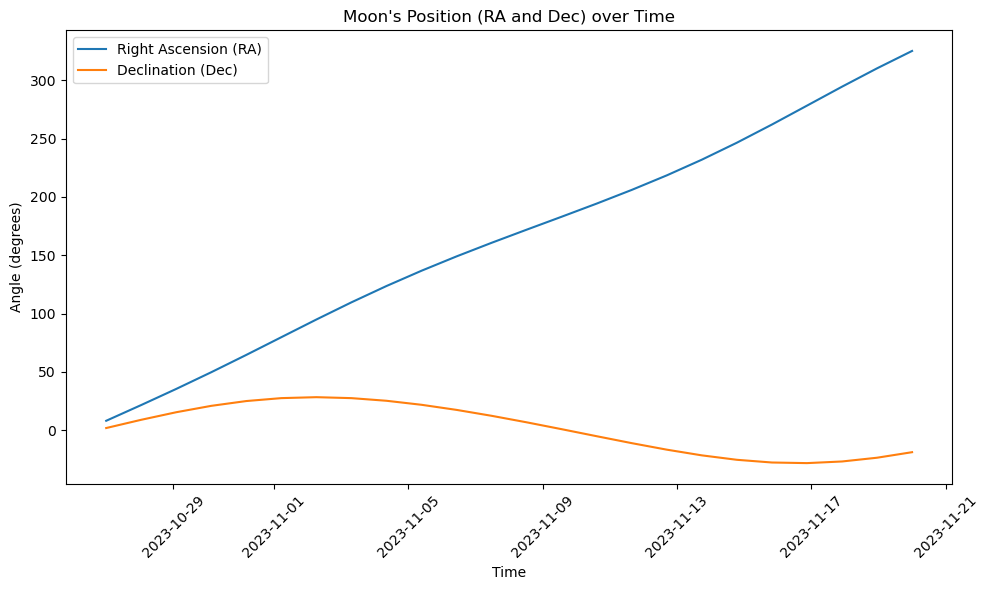

In [3]:
#Ay'ın belli bir zaman aralığı içerisindeki ephemeris bilgisi elde edildi ve grafik üzerinde RA - DEC değişimi araştırıldı.

start_time = Time("2023-10-27 00:00:00")
end_time = Time("2023-11-20 00:00:00")
times = start_time + (end_time - start_time) * np.linspace(0, 1, 24)

moon_ra = []
moon_dec = []

with solar_system_ephemeris.set('builtin'):
    moon = get_body('moon', times)
    for i in range(len(times)):
        moon_ra.append(moon[i].ra.deg)
        moon_dec.append(moon[i].dec.deg)

plt.figure(figsize=(10, 6))
plt.plot(times.datetime, moon_ra, label='Right Ascension (RA)')
plt.plot(times.datetime, moon_dec, label='Declination (Dec)')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.title("Moon's Position (RA and Dec) over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
pecaut_mamajek = [
        {'#SpT': 'O3V', 'Teff': '44900', 'logT': '4.652', 'BCv': '-4.01', 'logL': '5.82', 'Mbol': '-9.81', 'R_Rsun': '13.43', 'Mv': '-5.8', 'B-V': '-0.33', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '.....', 'U-B': '-1.175', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '59', '#SpT.1': 'O3V'}, 
        
        {'#SpT': 'O4V', 'Teff': '42900', 'logT': '4.632', 'BCv': '-3.89', 'logL': '5.65', 'Mbol': '-9.39', 'R_Rsun': '12.13', 'Mv': '-5.5', 'B-V': '-0.326', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '.....', 'U-B': '-1.16', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '48', '#SpT.1': 'O4V'}, 
        
        {'#SpT': 'O5V', 'Teff': '41400', 'logT': '4.617', 'BCv': '-3.76', 'logL': '5.54', 'Mbol': '-9.11', 'R_Rsun': '11.45', 'Mv': '-5.35', 'B-V': '-0.323', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.133', 'U-B': '-1.15', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '43', '#SpT.1': 'O5V'}, 
        
        {'#SpT': 'O5.5V', 'Teff': '40500', 'logT': '4.607', 'BCv': '-3.67', 'logL': '5.44', 'Mbol': '-8.87', 'R_Rsun': '10.71', 'Mv': '-5.2', 'B-V': '-0.322', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.133', 'U-B': '-1.145', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '38', '#SpT.1': 'O5.5V'}, 
        
        {'#SpT': 'O6V', 'Teff': '39500', 'logT': '4.597', 'BCv': '-3.57', 'logL': '5.36', 'Mbol': '-8.67', 'R_Rsun': '10.27', 'Mv': '-5.1', 'B-V': '-0.321', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.132', 'U-B': '-1.14', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '35', '#SpT.1': 'O6V'}, 
        
        {'#SpT': 'O6.5V', 'Teff': '38300', 'logT': '4.583', 'BCv': '-3.49', 'logL': '5.27', 'Mbol': '-8.44', 'R_Rsun': '9.82', 'Mv': '-4.95', 'B-V': '-0.319', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.131', 'U-B': '-1.135', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '31', '#SpT.1': 'O6.5V'}, 
        
        {'#SpT': 'O7V', 'Teff': '37100', 'logT': '4.569', 'BCv': '-3.41', 'logL': '5.18', 'Mbol': '-8.21', 'R_Rsun': '9.42', 'Mv': '-4.8', 'B-V': '-0.318', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.13', 'U-B': '-1.13', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '28', '#SpT.1': 'O7V'}, 
        
        {'#SpT': 'O7.5V', 'Teff': '36100', 'logT': '4.558', 'BCv': '-3.33', 'logL': '5.09', 'Mbol': '-7.98', 'R_Rsun': '8.95', 'Mv': '-4.65', 'B-V': '-0.317', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.13', 'U-B': '-1.125', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '26', '#SpT.1': 'O7.5V'}, 
        
        {'#SpT': 'O8V', 'Teff': '35100', 'logT': '4.545', 'BCv': '-3.24', 'logL': '4.99', 'Mbol': '-7.74', 'R_Rsun': '8.47', 'Mv': '-4.5', 'B-V': '-0.315', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.129', 'U-B': '-1.12', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '23.6', '#SpT.1': 'O8V'}, 
        
        {'#SpT': 'O8.5V', 'Teff': '34300', 'logT': '4.535', 'BCv': '-3.18', 'logL': '4.91', 'Mbol': '-7.53', 'R_Rsun': '8.06', 'Mv': '-4.35', 'B-V': '-0.314', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.128', 'U-B': '-1.115', 'V-Rc': '...', 'V-Ic': '.....', 'V-Ks': '.....', 'J-H': '.....', 'H-Ks': '.....', 'M_J': '....', 'M_Ks': '....', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '21.9', '#SpT.1': 'O8.5V'},
         
        {'#SpT': 'O9V', 'Teff': '33300', 'logT': '4.522', 'BCv': '-3.11', 'logL': '4.82', 'Mbol': '-7.31', 'R_Rsun': '7.72', 'Mv': '-4.2', 'B-V': '-0.312', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.127', 'U-B': '-1.11', 'V-Rc': '...', 'V-Ic': '-0.369', 'V-Ks': '-1', 'J-H': '-0.164', 'H-Ks': '-0.071', 'M_J': '-3.44', 'M_Ks': '-3.2', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '20.2', '#SpT.1': 'O9V'}, 
        
        {'#SpT': 'O9.5V', 'Teff': '31900', 'logT': '4.504', 'BCv': '-3.01', 'logL': '4.72', 'Mbol': '-7.06', 'R_Rsun': '7.5', 'Mv': '-4.05', 'B-V': '-0.307', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.125', 'U-B': '-1.09', 'V-Rc': '...', 'V-Ic': '-0.361', 'V-Ks': '-0.977', 'J-H': '-0.161', 'H-Ks': '-0.069', 'M_J': '-3.3', 'M_Ks': '-3.073', 'Ks-W1': '...', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.605', 'i-z': '...', 'z-Y': '...', 'Msun': '18.7', '#SpT.1': 'O9.5V'}, 
        
        {'#SpT': 'B0V', 'Teff': '31400', 'logT': '4.497', 'BCv': '-2.99', 'logL': '4.65', 'Mbol': '-6.89', 'R_Rsun': '7.16', 'Mv': '-3.9', 'B-V': '-0.301', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.122', 'U-B': '-1.07', 'V-Rc': '...', 'V-Ic': '-0.355', 'V-Ks': '-0.958', 'J-H': '-0.159', 'H-Ks': '-0.067', 'M_J': '-3.17', 'M_Ks': '-2.942', 'Ks-W1': '0.016', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.59', 'i-z': '...', 'z-Y': '...', 'Msun': '17.7', '#SpT.1': 'B0V'}, 
        
        {'#SpT': 'B0.5V', 'Teff': '29000', 'logT': '4.462', 'BCv': '-2.83', 'logL': '4.43', 'Mbol': '-6.33', 'R_Rsun': '6.48', 'Mv': '-3.5', 'B-V': '-0.289', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.12', 'U-B': '-1.03', 'V-Rc': '...', 'V-Ic': '-0.338', 'V-Ks': '-0.913', 'J-H': '-0.153', 'H-Ks': '-0.063', 'M_J': '-2.8', 'M_Ks': '-2.587', 'Ks-W1': '0.017', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.54', 'i-z': '...', 'z-Y': '...', 'Msun': '14.8', '#SpT.1': 'B0.5V'}, 
        
        {'#SpT': 'B1V', 'Teff': '26000', 'logT': '4.415', 'BCv': '-2.58', 'logL': '4.13', 'Mbol': '-5.58', 'R_Rsun': '5.71', 'Mv': '-3', 'B-V': '-0.278', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.113', 'U-B': '-0.995', 'V-Rc': '-0.115', 'V-Ic': '-0.325', 'V-Ks': '-0.874', 'J-H': '-0.148', 'H-Ks': '-0.059', 'M_J': '-2.33', 'M_Ks': '-2.126', 'Ks-W1': '0.018', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.49', 'i-z': '...', 'z-Y': '...', 'Msun': '11.8', '#SpT.1': 'B1V'}, 
        
        {'#SpT': 'B1.5V', 'Teff': '24500', 'logT': '4.389', 'BCv': '-2.44', 'logL': '3.91', 'Mbol': '-5.04', 'R_Rsun': '5.02', 'Mv': '-2.6', 'B-V': '-0.252', 'Bt-Vt': '-0.274', 'G-V': '-0.021', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.103', 'U-B': '-0.91', 'V-Rc': '-0.114', 'V-Ic': '-0.281', 'V-Ks': '-0.752', 'J-H': '-0.132', 'H-Ks': '-0.047', 'M_J': '-2.03', 'M_Ks': '-1.848', 'Ks-W1': '0.021', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.483', 'i-z': '...', 'z-Y': '...', 'Msun': '9.9', '#SpT.1': 'B1.5V'}, 
        
        {'#SpT': 'B2V', 'Teff': '20600', 'logT': '4.314', 'BCv': '-2.03', 'logL': '3.43', 'Mbol': '-3.83', 'R_Rsun': '4.06', 'Mv': '-1.8', 'B-V': '-0.215', 'Bt-Vt': '-0.219', 'G-V': '-0.008', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.094', 'U-B': '-0.79', 'V-Rc': '-0.094', 'V-Ic': '-0.23', 'V-Ks': '-0.602', 'J-H': '-0.113', 'H-Ks': '-0.032', 'M_J': '-1.34', 'M_Ks': '-1.198', 'Ks-W1': '0.023', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.475', 'i-z': '...', 'z-Y': '...', 'Msun': '7.3', '#SpT.1': 'B2V'}, 
        
        {'#SpT': 'B2.5V', 'Teff': '18500', 'logT': '4.267', 'BCv': '-1.77', 'logL': '3.2', 'Mbol': '-3.27', 'R_Rsun': '3.89', 'Mv': '-1.5', 'B-V': '-0.198', 'Bt-Vt': '-0.206', 'G-V': '-0.003', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '-0.087', 'U-B': '-0.732', 'V-Rc': '-0.087', 'V-Ic': '-0.21', 'V-Ks': '-0.544', 'J-H': '-0.105', 'H-Ks': '-0.026', 'M_J': '-1.09', 'M_Ks': '-0.956', 'Ks-W1': '0.025', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.468', 'i-z': '...', 'z-Y': '...', 'Msun': '6.1', '#SpT.1': 'B2.5V'}, 
        
        {'#SpT': 'B3V', 'Teff': '17000', 'logT': '4.23', 'BCv': '-1.54', 'logL': '2.99', 'Mbol': '-2.74', 'R_Rsun': '3.61', 'Mv': '-1.2', 'B-V': '-0.178', 'Bt-Vt': '-0.184', 'G-V': '0.001', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '-1.19', 'b-y': '-0.083', 'U-B': '-0.673', 'V-Rc': '-0.08', 'V-Ic': '-0.192', 'V-Ks': '-0.492', 'J-H': '-0.098', 'H-Ks': '-0.021', 'M_J': '-0.83', 'M_Ks': '-0.708', 'Ks-W1': '0.026', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.46', 'i-z': '...', 'z-Y': '...', 'Msun': '5.4', '#SpT.1': 'B3V'}, 
        
        {'#SpT': 'B4V', 'Teff': '16400', 'logT': '4.215', 'BCv': '-1.49', 'logL': '2.89', 'Mbol': '-2.49', 'R_Rsun': '3.46', 'Mv': '-1', 'B-V': '-0.165', 'Bt-Vt': '-0.17', 'G-V': '0.004', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '-0.99', 'b-y': '-0.078', 'U-B': '-0.619', 'V-Rc': '-0.074', 'V-Ic': '-0.176', 'V-Ks': '-0.447', 'J-H': '-0.092', 'H-Ks': '-0.016', 'M_J': '-0.66', 'M_Ks': '-0.553', 'Ks-W1': '0.028', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '-0.437', 'i-z': '...', 'z-Y': '...', 'Msun': '5.1', '#SpT.1': 'B4V'}, 
        
        {'#SpT': 'B5V', 'Teff': '15700', 'logT': '4.196', 'BCv': '-1.34', 'logL': '2.77', 'Mbol': '-2.19', 'R_Rsun': '3.36', 'Mv': '-0.85', 'B-V': '-0.156', 'Bt-Vt': '-0.16', 'G-V': '0.007', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '-0.84', 'b-y': '-0.072', 'U-B': '-0.581', 'V-Rc': '-0.07', 'V-Ic': '-0.165', 'V-Ks': '-0.38', 'J-H': '-0.084', 'H-Ks': '-0.01', 'M_J': '-0.54', 'M_Ks': '-0.376', 'Ks-W1': '0.029', 'W1-W2': '-0.045', 'W1-W3': '-0.117', 'W1-W4': '-0.07', 'g-r': '-0.413', 'i-z': '...', 'z-Y': '...', 'Msun': '4.7', '#SpT.1': 'B5V'}, 
        
        {'#SpT': 'B6V', 'Teff': '14500', 'logT': '4.161', 'BCv': '-1.13', 'logL': '2.57', 'Mbol': '-1.68', 'R_Rsun': '3.27', 'Mv': '-0.55', 'B-V': '-0.14', 'Bt-Vt': '-0.142', 'G-V': '0.01', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '-0.54', 'b-y': '-0.066', 'U-B': '-0.504', 'V-Rc': '-0.062', 'V-Ic': '-0.145', 'V-Ks': '-0.358', 'J-H': '-0.081', 'H-Ks': '-0.007', 'M_J': '-0.28', 'M_Ks': '-0.192', 'Ks-W1': '0.03', 'W1-W2': '-0.045', 'W1-W3': '-0.117', 'W1-W4': '-0.07', 'g-r': '-0.39', 'i-z': '...', 'z-Y': '...', 'Msun': '4.3', '#SpT.1': 'B6V'}, 
        
        {'#SpT': 'B7V', 'Teff': '14000', 'logT': '4.146', 'BCv': '-1.05', 'logL': '2.48', 'Mbol': '-1.45', 'R_Rsun': '2.94', 'Mv': '-0.4', 'B-V': '-0.128', 'Bt-Vt': '-0.129', 'G-V': '0.012', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '-0.39', 'b-y': '-0.062', 'U-B': '-0.459', 'V-Rc': '-0.058', 'V-Ic': '-0.133', 'V-Ks': '-0.325', 'J-H': '-0.077', 'H-Ks': '-0.004', 'M_J': '-0.16', 'M_Ks': '-0.075', 'Ks-W1': '0.031', 'W1-W2': '-0.045', 'W1-W3': '-0.117', 'W1-W4': '-0.07', 'g-r': '-0.36', 'i-z': '...', 'z-Y': '...', 'Msun': '3.92', '#SpT.1': 'B7V'}, 
        
        {'#SpT': 'B8V', 'Teff': '12300', 'logT': '4.09', 'BCv': '-0.73', 'logL': '2.19', 'Mbol': '-0.73', 'R_Rsun': '2.86', 'Mv': '0', 'B-V': '-0.109', 'Bt-Vt': '-0.107', 'G-V': '0.016', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '-0.01', 'b-y': '-0.045', 'U-B': '-0.364', 'V-Rc': '-0.048', 'V-Ic': '-0.108', 'V-Ks': '-0.254', 'J-H': '-0.067', 'H-Ks': '0.003', 'M_J': '0.19', 'M_Ks': '0.254', 'Ks-W1': '0.033', 'W1-W2': '-0.046', 'W1-W3': '-0.116', 'W1-W4': '-0.067', 'g-r': '-0.33', 'i-z': '...', 'z-Y': '...', 'Msun': '3.38', '#SpT.1': 'B8V'}, 
        
        {'#SpT': 'B9V', 'Teff': '10700', 'logT': '4.029', 'BCv': '-0.42', 'logL': '1.86', 'Mbol': '0.08', 'R_Rsun': '2.49', 'Mv': '0.5', 'B-V': '-0.07', 'Bt-Vt': '-0.063', 'G-V': '0.018', 'Bp-Rp': '-0.12', 'G-Rp': '-0.036', 'M_G': '0.515', 'b-y': '-0.029', 'U-B': '-0.2', 'V-Rc': '-0.028', 'V-Ic': '-0.061', 'V-Ks': '-0.121', 'J-H': '-0.05', 'H-Ks': '0.016', 'M_J': '0.59', 'M_Ks': '0.621', 'Ks-W1': '0.038', 'W1-W2': '-0.063', 'W1-W3': '-0.104', 'W1-W4': '-0.054', 'g-r': '-0.28', 'i-z': '...', 'z-Y': '...', 'Msun': '2.75', '#SpT.1': 'B9V'}, 
        
        {'#SpT': 'B9.5V', 'Teff': '10400', 'logT': '4.017', 'BCv': '-0.36', 'logL': '1.8', 'Mbol': '0.24', 'R_Rsun': '2.45', 'Mv': '0.6', 'B-V': '-0.05', 'Bt-Vt': '-0.04', 'G-V': '0.017', 'Bp-Rp': '-0.087', 'G-Rp': '-0.016', 'M_G': '0.615', 'b-y': '-0.021', 'U-B': '-0.13', 'V-Rc': '-0.017', 'V-Ic': '-0.035', 'V-Ks': '-0.048', 'J-H': '-0.044', 'H-Ks': '0.021', 'M_J': '0.63', 'M_Ks': '0.648', 'Ks-W1': '0.04', 'W1-W2': '-0.044', 'W1-W3': '-0.091', 'W1-W4': '-0.043', 'g-r': '-0.265', 'i-z': '...', 'z-Y': '...', 'Msun': '2.68', '#SpT.1': 'B9.5V'}, 
        
        {'#SpT': 'A0V', 'Teff': '9700', 'logT': '3.987', 'BCv': '-0.21', 'logL': '1.58', 'Mbol': '0.78', 'R_Rsun': '2.193', 'Mv': '0.99', 'B-V': '0', 'Bt-Vt': '0.013', 'G-V': '0.015', 'Bp-Rp': '-0.037', 'G-Rp': '-0.02', 'M_G': '1', 'b-y': '0', 'U-B': '-0.005', 'V-Rc': '0.001', 'V-Ic': '0.004', 'V-Ks': '0.041', 'J-H': '-0.032', 'H-Ks': '0.028', 'M_J': '0.95', 'M_Ks': '0.949', 'Ks-W1': '0.042', 'W1-W2': '-0.041', 'W1-W3': '-0.074', 'W1-W4': '-0.022', 'g-r': '-0.25', 'i-z': '...', 'z-Y': '...', 'Msun': '2.18', '#SpT.1': 'A0V'}, 
        
        {'#SpT': 'A1V', 'Teff': '9300', 'logT': '3.968', 'BCv': '-0.14', 'logL': '1.49', 'Mbol': '1.02', 'R_Rsun': '2.136', 'Mv': '1.16', 'B-V': '0.035', 'Bt-Vt': '0.056', 'G-V': '0.01', 'Bp-Rp': '0.005', 'G-Rp': '0.032', 'M_G': '1.16', 'b-y': '0.017', 'U-B': '0.033', 'V-Rc': '0.019', 'V-Ic': '0.044', 'V-Ks': '0.09', 'J-H': '-0.025', 'H-Ks': '0.03', 'M_J': '1.08', 'M_Ks': '1.07', 'Ks-W1': '0.043', 'W1-W2': '-0.036', 'W1-W3': '-0.068', 'W1-W4': '-0.023', 'g-r': '-0.21', 'i-z': '...', 'z-Y': '...', 'Msun': '2.05', '#SpT.1': 'A1V'}, 
        
        {'#SpT': 'A2V', 'Teff': '8800', 'logT': '3.944', 'BCv': '-0.07', 'logL': '1.38', 'Mbol': '1.28', 'R_Rsun': '2.117', 'Mv': '1.35', 'B-V': '0.07', 'Bt-Vt': '0.091', 'G-V': '0', 'Bp-Rp': '0.068', 'G-Rp': '0.05', 'M_G': '1.345', 'b-y': '0.038', 'U-B': '0.063', 'V-Rc': '0.042', 'V-Ic': '0.091', 'V-Ks': '0.178', 'J-H': '-0.012', 'H-Ks': '0.034', 'M_J': '1.19', 'M_Ks': '1.172', 'Ks-W1': '0.044', 'W1-W2': '-0.034', 'W1-W3': '-0.067', 'W1-W4': '-0.029', 'g-r': '-0.17', 'i-z': '...', 'z-Y': '...', 'Msun': '1.98', '#SpT.1': 'A2V'}, 
        
        {'#SpT': 'A3V', 'Teff': '8600', 'logT': '3.934', 'BCv': '-0.04', 'logL': '1.23', 'Mbol': '1.66', 'R_Rsun': '1.861', 'Mv': '1.7', 'B-V': '0.1', 'Bt-Vt': '0.109', 'G-V': '-0.005', 'Bp-Rp': '0.11', 'G-Rp': '0.092', 'M_G': '1.69', 'b-y': '0.055', 'U-B': '0.077', 'V-Rc': '0.05', 'V-Ic': '0.108', 'V-Ks': '0.253', 'J-H': '0.003', 'H-Ks': '0.035', 'M_J': '1.49', 'M_Ks': '1.447', 'Ks-W1': '0.045', 'W1-W2': '-0.033', 'W1-W3': '-0.066', 'W1-W4': '-0.029', 'g-r': '-0.14', 'i-z': '...', 'z-Y': '...', 'Msun': '1.86', '#SpT.1': 'A3V'}, 
        
        {'#SpT': 'A4V', 'Teff': '8250', 'logT': '3.917', 'BCv': '-0.02', 'logL': '1.13', 'Mbol': '1.92', 'R_Rsun': '1.794', 'Mv': '1.94', 'B-V': '0.14', 'Bt-Vt': '0.166', 'G-V': '-0.01', 'Bp-Rp': '0.166', 'G-Rp': '0.113', 'M_G': '1.92', 'b-y': '0.071', 'U-B': '0.097', 'V-Rc': '0.078', 'V-Ic': '0.164', 'V-Ks': '0.353', 'J-H': '0.022', 'H-Ks': '0.037', 'M_J': '1.65', 'M_Ks': '1.587', 'Ks-W1': '0.046', 'W1-W2': '-0.031', 'W1-W3': '-0.059', 'W1-W4': '-0.021', 'g-r': '-0.09', 'i-z': '...', 'z-Y': '...', 'Msun': '1.93', '#SpT.1': 'A4V'}, 
        
        {'#SpT': 'A5V', 'Teff': '8100', 'logT': '3.908', 'BCv': '0', 'logL': '1.09', 'Mbol': '2.01', 'R_Rsun': '1.785', 'Mv': '2.01', 'B-V': '0.16', 'Bt-Vt': '0.185', 'G-V': '-0.015', 'Bp-Rp': '0.194', 'G-Rp': '0.13', 'M_G': '1.98', 'b-y': '0.09', 'U-B': '0.1', 'V-Rc': '0.089', 'V-Ic': '0.186', 'V-Ks': '0.403', 'J-H': '0.031', 'H-Ks': '0.038', 'M_J': '1.68', 'M_Ks': '1.607', 'Ks-W1': '0.046', 'W1-W2': '-0.03', 'W1-W3': '-0.058', 'W1-W4': '-0.021', 'g-r': '-0.07', 'i-z': '...', 'z-Y': '...', 'Msun': '1.88', '#SpT.1': 'A5V'}, 
        
        {'#SpT': 'A6V', 'Teff': '7910', 'logT': '3.898', 'BCv': '0.005', 'logL': '1.05', 'Mbol': '2.13', 'R_Rsun': '1.775', 'Mv': '2.12', 'B-V': '0.185', 'Bt-Vt': '0.194', 'G-V': '-0.02', 'Bp-Rp': '0.222', 'G-Rp': '0.152', 'M_G': '2.09', 'b-y': '0.099', 'U-B': '0.098', 'V-Rc': '0.094', 'V-Ic': '0.197', 'V-Ks': '0.465', 'J-H': '0.043', 'H-Ks': '0.039', 'M_J': '1.74', 'M_Ks': '1.655', 'Ks-W1': '0.046', 'W1-W2': '-0.03', 'W1-W3': '-0.057', 'W1-W4': '-0.018', 'g-r': '-0.05', 'i-z': '...', 'z-Y': '...', 'Msun': '1.83', '#SpT.1': 'A6V'}, 
        
        {'#SpT': 'A7V', 'Teff': '7760', 'logT': '3.89', 'BCv': '0.01', 'logL': '1', 'Mbol': '2.24', 'R_Rsun': '1.75', 'Mv': '2.23', 'B-V': '0.21', 'Bt-Vt': '0.233', 'G-V': '-0.03', 'Bp-Rp': '0.263', 'G-Rp': '0.173', 'M_G': '2.19', 'b-y': '0.107', 'U-B': '0.091', 'V-Rc': '0.117', 'V-Ic': '0.242', 'V-Ks': '0.528', 'J-H': '0.055', 'H-Ks': '0.04', 'M_J': '1.8', 'M_Ks': '1.702', 'Ks-W1': '0.047', 'W1-W2': '-0.03', 'W1-W3': '-0.056', 'W1-W4': '-0.017', 'g-r': '-0.02', 'i-z': '...', 'z-Y': '...', 'Msun': '1.77', '#SpT.1': 'A7V'}, {'#SpT': 'A8V', 'Teff': '7590', 'logT': '3.88', 'BCv': '0.02', 'logL': '0.96', 'Mbol': '2.34', 'R_Rsun': '1.747', 'Mv': '2.32', 'B-V': '0.25', 'Bt-Vt': '0.274', 'G-V': '-0.04', 'Bp-Rp': '0.32', 'G-Rp': '0.204', 'M_G': '2.27', 'b-y': '0.132', 'U-B': '0.082', 'V-Rc': '0.14', 'V-Ic': '0.288', 'V-Ks': '0.601', 'J-H': '0.07', 'H-Ks': '0.042', 'M_J': '1.81', 'M_Ks': '1.694', 'Ks-W1': '0.048', 'W1-W2': '-0.028', 'W1-W3': '-0.055', 'W1-W4': '-0.009', 'g-r': '0.03', 'i-z': '...', 'z-Y': '...', 'Msun': '1.81', '#SpT.1': 'A8V'}, 
        
        {'#SpT': 'A9V', 'Teff': '7400', 'logT': '3.869', 'BCv': '0.02', 'logL': '0.92', 'Mbol': '2.45', 'R_Rsun': '1.747', 'Mv': '2.43', 'B-V': '0.27', 'Bt-Vt': '0.279', 'G-V': '-0.05', 'Bp-Rp': '0.327', 'G-Rp': '0.207', 'M_G': '2.37', 'b-y': '0.145', 'U-B': '0.08', 'V-Rc': '0.143', 'V-Ic': '0.294', 'V-Ks': '0.674', 'J-H': '0.086', 'H-Ks': '0.044', 'M_J': '1.89', 'M_Ks': '1.756', 'Ks-W1': '0.048', 'W1-W2': '-0.028', 'W1-W3': '-0.055', 'W1-W4': '-0.007', 'g-r': '0.06', 'i-z': '...', 'z-Y': '...', 'Msun': '1.75', '#SpT.1': 'A9V'}, 
        
        {'#SpT': 'F0V', 'Teff': '7220', 'logT': '3.859', 'BCv': '0.01', 'logL': '0.86', 'Mbol': '2.58', 'R_Rsun': '1.728', 'Mv': '2.57', 'B-V': '0.295', 'Bt-Vt': '0.317', 'G-V': '-0.06', 'Bp-Rp': '0.377', 'G-Rp': '0.23', 'M_G': '2.51', 'b-y': '0.158', 'U-B': '0.053', 'V-Rc': '0.166', 'V-Ic': '0.339', 'V-Ks': '0.734', 'J-H': '0.096', 'H-Ks': '0.045', 'M_J': '1.98', 'M_Ks': '1.836', 'Ks-W1': '0.049', 'W1-W2': '-0.026', 'W1-W3': '-0.05', 'W1-W4': '0.003', 'g-r': '0.1', 'i-z': '...', 'z-Y': '...', 'Msun': '1.61', '#SpT.1': 'F0V'}, 
        
        {'#SpT': 'F1V', 'Teff': '7020', 'logT': '3.846', 'BCv': '0.005', 'logL': '0.79', 'Mbol': '2.77', 'R_Rsun': '1.679', 'Mv': '2.76', 'B-V': '0.33', 'Bt-Vt': '0.35', 'G-V': '-0.07', 'Bp-Rp': '0.434', 'G-Rp': '0.252', 'M_G': '2.69', 'b-y': '0.204', 'U-B': '0.021', 'V-Rc': '0.19', 'V-Ic': '0.385', 'V-Ks': '0.819', 'J-H': '0.117', 'H-Ks': '0.047', 'M_J': '2.11', 'M_Ks': '1.941', 'Ks-W1': '0.05', 'W1-W2': '-0.026', 'W1-W3': '-0.047', 'W1-W4': '0.009', 'g-r': '0.14', 'i-z': '...', 'z-Y': '...', 'Msun': '1.5', '#SpT.1': 'F1V'}, 
        
        {'#SpT': 'F2V', 'Teff': '6820', 'logT': '3.834', 'BCv': '-0.005', 'logL': '0.71', 'Mbol': '2.97', 'R_Rsun': '1.622', 'Mv': '2.97', 'B-V': '0.37', 'Bt-Vt': '0.39', 'G-V': '-0.08', 'Bp-Rp': '0.49', 'G-Rp': '0.279', 'M_G': '2.89', 'b-y': '0.25', 'U-B': '-0.008', 'V-Rc': '0.213', 'V-Ic': '0.432', 'V-Ks': '0.925', 'J-H': '0.14', 'H-Ks': '0.05', 'M_J': '2.24', 'M_Ks': '2.045', 'Ks-W1': '0.051', 'W1-W2': '-0.027', 'W1-W3': '-0.046', 'W1-W4': '0.011', 'g-r': '0.19', 'i-z': '...', 'z-Y': '...', 'Msun': '1.46', '#SpT.1': 'F2V'}, 
        
        {'#SpT': 'F3V', 'Teff': '6750', 'logT': '3.829', 'BCv': '-0.01', 'logL': '0.67', 'Mbol': '3.07', 'R_Rsun': '1.578', 'Mv': '3.08', 'B-V': '0.39', 'Bt-Vt': '0.405', 'G-V': '-0.09', 'Bp-Rp': '0.518', 'G-Rp': '0.293', 'M_G': '2.99', 'b-y': '0.263', 'U-B': '-0.016', 'V-Rc': '0.222', 'V-Ic': '0.449', 'V-Ks': '0.964', 'J-H': '0.148', 'H-Ks': '0.051', 'M_J': '2.32', 'M_Ks': '2.116', 'Ks-W1': '0.051', 'W1-W2': '-0.028', 'W1-W3': '-0.046', 'W1-W4': '0.008', 'g-r': '0.21', 'i-z': '...', 'z-Y': '...', 'Msun': '1.44', '#SpT.1': 'F3V'}, 
        
        {'#SpT': 'F4V', 'Teff': '6670', 'logT': '3.824', 'BCv': '-0.015', 'logL': '0.62', 'Mbol': '3.19', 'R_Rsun': '1.533', 'Mv': '3.2', 'B-V': '0.41', 'Bt-Vt': '0.428', 'G-V': '-0.1', 'Bp-Rp': '0.546', 'G-Rp': '0.307', 'M_G': '3.1', 'b-y': '0.277', 'U-B': '-0.026', 'V-Rc': '0.236', 'V-Ic': '0.476', 'V-Ks': '1.012', 'J-H': '0.159', 'H-Ks': '0.052', 'M_J': '2.4', 'M_Ks': '2.188', 'Ks-W1': '0.052', 'W1-W2': '-0.029', 'W1-W3': '-0.046', 'W1-W4': '0', 'g-r': '0.24', 'i-z': '...', 'z-Y': '...', 'Msun': '1.38', '#SpT.1': 'F4V'}, 
        
        {'#SpT': 'F5V', 'Teff': '6550', 'logT': '3.816', 'BCv': '-0.02', 'logL': '0.56', 'Mbol': '3.35', 'R_Rsun': '1.473', 'Mv': '3.37', 'B-V': '0.44', 'Bt-Vt': '0.455', 'G-V': '-0.11', 'Bp-Rp': '0.587', 'G-Rp': '0.329', 'M_G': '3.26', 'b-y': '0.29', 'U-B': '-0.029', 'V-Rc': '0.252', 'V-Ic': '0.506', 'V-Ks': '1.079', 'J-H': '0.173', 'H-Ks': '0.054', 'M_J': '2.52', 'M_Ks': '2.291', 'Ks-W1': '0.052', 'W1-W2': '-0.03', 'W1-W3': '-0.045', 'W1-W4': '-0.004', 'g-r': '0.28', 'i-z': '...', 'z-Y': '...', 'Msun': '1.33', '#SpT.1': 'F5V'}, 
        
        {'#SpT': 'F6V', 'Teff': '6350', 'logT': '3.803', 'BCv': '-0.03', 'logL': '0.43', 'Mbol': '3.66', 'R_Rsun': '1.359', 'Mv': '3.69', 'B-V': '0.486', 'Bt-Vt': '0.504', 'G-V': '-0.13', 'Bp-Rp': '0.64', 'G-Rp': '0.356', 'M_G': '3.56', 'b-y': '0.317', 'U-B': '-0.021', 'V-Rc': '0.276', 'V-Ic': '0.553', 'V-Ks': '1.19', 'J-H': '0.199', 'H-Ks': '0.057', 'M_J': '2.76', 'M_Ks': '2.5', 'Ks-W1': '0.054', 'W1-W2': '-0.033', 'W1-W3': '-0.045', 'W1-W4': '-0.012', 'g-r': '0.29', 'i-z': '...', 'z-Y': '...', 'Msun': '1.25', '#SpT.1': 'F6V'}, 
        
        {'#SpT': 'F7V', 'Teff': '6280', 'logT': '3.798', 'BCv': '-0.035', 'logL': '0.39', 'Mbol': '3.77', 'R_Rsun': '1.324', 'Mv': '3.8', 'B-V': '0.5', 'Bt-Vt': '0.534', 'G-V': '-0.14', 'Bp-Rp': '0.67', 'G-Rp': '0.372', 'M_G': '3.66', 'b-y': '0.332', 'U-B': '-0.012', 'V-Rc': '0.29', 'V-Ic': '0.579', 'V-Ks': '1.221', 'J-H': '0.213', 'H-Ks': '0.06', 'M_J': '2.85', 'M_Ks': '2.579', 'Ks-W1': '0.055', 'W1-W2': '-0.036', 'W1-W3': '-0.045', 'W1-W4': '-0.013', 'g-r': '0.32', 'i-z': '...', 'z-Y': '...', 'Msun': '1.21', '#SpT.1': 'F7V'}, 
        
        {'#SpT': 'F8V', 'Teff': '6180', 'logT': '3.791', 'BCv': '-0.04', 'logL': '0.29', 'Mbol': '4.01', 'R_Rsun': '1.221', 'Mv': '4.05', 'B-V': '0.53', 'Bt-Vt': '0.558', 'G-V': '-0.15', 'Bp-Rp': '0.694', 'G-Rp': '0.385', 'M_G': '3.9', 'b-y': '0.35', 'U-B': '0.001', 'V-Rc': '0.3', 'V-Ic': '0.599', 'V-Ks': '1.29', 'J-H': '0.225', 'H-Ks': '0.061', 'M_J': '3.05', 'M_Ks': '2.76', 'Ks-W1': '0.056', 'W1-W2': '-0.039', 'W1-W3': '-0.044', 'W1-W4': '-0.016', 'g-r': '0.36', 'i-z': '...', 'z-Y': '...', 'Msun': '1.18', '#SpT.1': 'F8V'}, 
        
        {'#SpT': 'F9V', 'Teff': '6050', 'logT': '3.782', 'BCv': '-0.05', 'logL': '0.22', 'Mbol': '4.2', 'R_Rsun': '1.167', 'Mv': '4.25', 'B-V': '0.56', 'Bt-Vt': '0.587', 'G-V': '-0.145', 'Bp-Rp': '0.719', 'G-Rp': '0.399', 'M_G': '4.105', 'b-y': '0.378', 'U-B': '0.014', 'V-Rc': '0.312', 'V-Ic': '0.62', 'V-Ks': '1.335', 'J-H': '0.236', 'H-Ks': '0.063', 'M_J': '3.21', 'M_Ks': '2.915', 'Ks-W1': '0.057', 'W1-W2': '-0.041', 'W1-W3': '-0.044', 'W1-W4': '-0.014', 'g-r': '0.38', 'i-z': '...', 'z-Y': '...', 'Msun': '1.13', '#SpT.1': 'F9V'}, 
        
        {'#SpT': 'F9.5V', 'Teff': '5990', 'logT': '3.777', 'BCv': '-0.06', 'logL': '0.18', 'Mbol': '4.29', 'R_Rsun': '1.142', 'Mv': '4.35', 'B-V': '0.58', 'Bt-Vt': '0.615', 'G-V': '-0.155', 'Bp-Rp': '0.767', 'G-Rp': '0.431', 'M_G': '4.195', 'b-y': '...', 'U-B': '0.033', 'V-Rc': '0.323', 'V-Ic': '0.64', 'V-Ks': '1.403', 'J-H': '0.249', 'H-Ks': '0.065', 'M_J': '3.26', 'M_Ks': '2.947', 'Ks-W1': '0.057', 'W1-W2': '-0.042', 'W1-W3': '-0.043', 'W1-W4': '-0.012', 'g-r': '0.39', 'i-z': '...', 'z-Y': '...', 'Msun': '1.08', '#SpT.1': 'F9.5V'}, 
        
        {'#SpT': 'G0V', 'Teff': '5930', 'logT': '3.773', 'BCv': '-0.065', 'logL': '0.13', 'Mbol': '4.42', 'R_Rsun': '1.1', 'Mv': '4.48', 'B-V': '0.595', 'Bt-Vt': '0.65', 'G-V': '-0.155', 'Bp-Rp': '0.784', 'G-Rp': '0.439', 'M_G': '4.325', 'b-y': '...', 'U-B': '0.057', 'V-Rc': '0.341', 'V-Ic': '0.673', 'V-Ks': '1.437', 'J-H': '0.262', 'H-Ks': '0.067', 'M_J': '3.37', 'M_Ks': '3.043', 'Ks-W1': '0.058', 'W1-W2': '-0.043', 'W1-W3': '-0.043', 'W1-W4': '-0.01', 'g-r': '0.42', 'i-z': '...', 'z-Y': '...', 'Msun': '1.06', '#SpT.1': 'G0V'}, 
        
        {'#SpT': 'G1V', 'Teff': '5860', 'logT': '3.768', 'BCv': '-0.073', 'logL': '0.08', 'Mbol': '4.55', 'R_Rsun': '1.06', 'Mv': '4.62', 'B-V': '0.622', 'Bt-Vt': '0.661', 'G-V': '-0.158', 'Bp-Rp': '0.803', 'G-Rp': '0.448', 'M_G': '4.462', 'b-y': '...', 'U-B': '0.067', 'V-Rc': '0.34', 'V-Ic': '0.672', 'V-Ks': '1.5', 'J-H': '0.279', 'H-Ks': '0.07', 'M_J': '3.47', 'M_Ks': '3.12', 'Ks-W1': '0.06', 'W1-W2': '-0.044', 'W1-W3': '-0.042', 'W1-W4': '-0.01', 'g-r': '0.45', 'i-z': '...', 'z-Y': '...', 'Msun': '1.03', '#SpT.1': 'G1V'}, 
        
        {'#SpT': 'G2V', 'Teff': '5770', 'logT': '3.761', 'BCv': '-0.085', 'logL': '0.01', 'Mbol': '4.72', 'R_Rsun': '1.012', 'Mv': '4.8', 'B-V': '0.65', 'Bt-Vt': '0.724', 'G-V': '-0.165', 'Bp-Rp': '0.823', 'G-Rp': '0.459', 'M_G': '4.635', 'b-y': '...', 'U-B': '0.133', 'V-Rc': '0.363', 'V-Ic': '0.713', 'V-Ks': '1.564', 'J-H': '0.293', 'H-Ks': '0.073', 'M_J': '3.6', 'M_Ks': '3.236', 'Ks-W1': '0.061', 'W1-W2': '-0.05', 'W1-W3': '-0.04', 'W1-W4': '-0.016', 'g-r': '0.476', 'i-z': '...', 'z-Y': '...', 'Msun': '1', '#SpT.1': 'G2V'}, 
        
        {'#SpT': 'G3V', 'Teff': '5720', 'logT': '3.757', 'BCv': '-0.095', 'logL': '-0.01', 'Mbol': '4.78', 'R_Rsun': '1.002', 'Mv': '4.87', 'B-V': '0.66', 'Bt-Vt': '0.739', 'G-V': '-0.167', 'Bp-Rp': '0.832', 'G-Rp': '0.464', 'M_G': '4.703', 'b-y': '...', 'U-B': '0.152', 'V-Rc': '0.368', 'V-Ic': '0.722', 'V-Ks': '1.588', 'J-H': '0.299', 'H-Ks': '0.074', 'M_J': '3.66', 'M_Ks': '3.282', 'Ks-W1': '0.061', 'W1-W2': '-0.05', 'W1-W3': '-0.04', 'W1-W4': '-0.014', 'g-r': '0.48', 'i-z': '...', 'z-Y': '...', 'Msun': '0.99', '#SpT.1': 'G3V'}, 
        
        {'#SpT': 'G4V', 'Teff': '5680', 'logT': '3.754', 'BCv': '-0.1', 'logL': '-0.04', 'Mbol': '4.83', 'R_Rsun': '0.991', 'Mv': '4.93', 'B-V': '0.67', 'Bt-Vt': '0.757', 'G-V': '-0.173', 'Bp-Rp': '0.841', 'G-Rp': '0.468', 'M_G': '4.757', 'b-y': '...', 'U-B': '0.175', 'V-Rc': '0.374', 'V-Ic': '0.733', 'V-Ks': '1.611', 'J-H': '0.304', 'H-Ks': '0.075', 'M_J': '3.7', 'M_Ks': '3.319', 'Ks-W1': '0.062', 'W1-W2': '-0.052', 'W1-W3': '-0.041', 'W1-W4': '-0.014', 'g-r': '0.49', 'i-z': '...', 'z-Y': '...', 'Msun': '0.985', '#SpT.1': 'G4V'}, 
        
        {'#SpT': 'G5V', 'Teff': '5660', 'logT': '3.753', 'BCv': '-0.105', 'logL': '-0.05', 'Mbol': '4.88', 'R_Rsun': '0.977', 'Mv': '4.98', 'B-V': '0.68', 'Bt-Vt': '0.764', 'G-V': '-0.179', 'Bp-Rp': '0.85', 'G-Rp': '0.473', 'M_G': '4.801', 'b-y': '...', 'U-B': '0.185', 'V-Rc': '0.377', 'V-Ic': '0.738', 'V-Ks': '1.635', 'J-H': '0.31', 'H-Ks': '0.076', 'M_J': '3.73', 'M_Ks': '3.345', 'Ks-W1': '0.062', 'W1-W2': '-0.052', 'W1-W3': '-0.041', 'W1-W4': '-0.014', 'g-r': '0.5', 'i-z': '...', 'z-Y': '...', 'Msun': '0.98', '#SpT.1': 'G5V'}, 
        
        {'#SpT': 'G6V', 'Teff': '5600', 'logT': '3.748', 'BCv': '-0.115', 'logL': '-0.1', 'Mbol': '4.99', 'R_Rsun': '0.949', 'Mv': '5.1', 'B-V': '0.7', 'Bt-Vt': '0.796', 'G-V': '-0.186', 'Bp-Rp': '0.869', 'G-Rp': '0.483', 'M_G': '4.914', 'b-y': '...', 'U-B': '0.227', 'V-Rc': '0.388', 'V-Ic': '0.758', 'V-Ks': '1.691', 'J-H': '0.324', 'H-Ks': '0.079', 'M_J': '3.81', 'M_Ks': '3.409', 'Ks-W1': '0.063', 'W1-W2': '-0.053', 'W1-W3': '-0.04', 'W1-W4': '-0.012', 'g-r': '0.52', 'i-z': '...', 'z-Y': '...', 'Msun': '0.97', '#SpT.1': 'G6V'}, 
        
        {'#SpT': 'G7V', 'Teff': '5550', 'logT': '3.744', 'BCv': '-0.125', 'logL': '-0.13', 'Mbol': '5.08', 'R_Rsun': '0.927', 'Mv': '5.2', 'B-V': '0.71', 'Bt-Vt': '0.809', 'G-V': '-0.194', 'Bp-Rp': '0.88', 'G-Rp': '0.489', 'M_G': '5.006', 'b-y': '...', 'U-B': '0.243', 'V-Rc': '0.393', 'V-Ic': '0.766', 'V-Ks': '1.705', 'J-H': '0.327', 'H-Ks': '0.08', 'M_J': '3.9', 'M_Ks': '3.495', 'Ks-W1': '0.064', 'W1-W2': '-0.054', 'W1-W3': '-0.04', 'W1-W4': '-0.013', 'g-r': '0.54', 'i-z': '...', 'z-Y': '...', 'Msun': '0.95', '#SpT.1': 'G7V'}, 
        
        {'#SpT': 'G8V', 'Teff': '5480', 'logT': '3.739', 'BCv': '-0.14', 'logL': '-0.17', 'Mbol': '5.16', 'R_Rsun': '0.914', 'Mv': '5.3', 'B-V': '0.73', 'Bt-Vt': '0.842', 'G-V': '-0.202', 'Bp-Rp': '0.9', 'G-Rp': '0.499', 'M_G': '5.098', 'b-y': '...', 'U-B': '0.284', 'V-Rc': '0.404', 'V-Ic': '0.786', 'V-Ks': '1.768', 'J-H': '0.342', 'H-Ks': '0.082', 'M_J': '3.96', 'M_Ks': '3.532', 'Ks-W1': '0.065', 'W1-W2': '-0.057', 'W1-W3': '-0.039', 'W1-W4': '-0.018', 'g-r': '0.57', 'i-z': '...', 'z-Y': '...', 'Msun': '0.94', '#SpT.1': 'G8V'}, 
        
        {'#SpT': 'G9V', 'Teff': '5380', 'logT': '3.731', 'BCv': '-0.16', 'logL': '-0.26', 'Mbol': '5.39', 'R_Rsun': '0.853', 'Mv': '5.55', 'B-V': '0.775', 'Bt-Vt': '0.894', 'G-V': '-0.21', 'Bp-Rp': '0.95', 'G-Rp': '0.524', 'M_G': '5.34', 'b-y': '...', 'U-B': '0.358', 'V-Rc': '0.423', 'V-Ic': '0.82', 'V-Ks': '1.857', 'J-H': '0.364', 'H-Ks': '0.087', 'M_J': '4.14', 'M_Ks': '3.693', 'Ks-W1': '0.067', 'W1-W2': '-0.06', 'W1-W3': '-0.038', 'W1-W4': '-0.018', 'g-r': '0.6', 'i-z': '...', 'z-Y': '...', 'Msun': '0.9', '#SpT.1': 'G9V'}, 
        
        {'#SpT': 'K0V', 'Teff': '5270', 'logT': '3.723', 'BCv': '-0.195', 'logL': '-0.34', 'Mbol': '5.59', 'R_Rsun': '0.813', 'Mv': '5.78', 'B-V': '0.816', 'Bt-Vt': '0.944', 'G-V': '-0.227', 'Bp-Rp': '0.983', 'G-Rp': '0.56', 'M_G': '5.553', 'b-y': '...', 'U-B': '0.436', 'V-Rc': '0.443', 'V-Ic': '0.853', 'V-Ks': '1.953', 'J-H': '0.387', 'H-Ks': '0.091', 'M_J': '4.31', 'M_Ks': '3.827', 'Ks-W1': '0.07', 'W1-W2': '-0.063', 'W1-W3': '-0.037', 'W1-W4': '-0.015', 'g-r': '0.62', 'i-z': '...', 'z-Y': '...', 'Msun': '0.88', '#SpT.1': 'K0V'}, 
        
        {'#SpT': 'K1V', 'Teff': '5170', 'logT': '3.713', 'BCv': '-0.23', 'logL': '-0.39', 'Mbol': '5.72', 'R_Rsun': '0.797', 'Mv': '5.95', 'B-V': '0.857', 'Bt-Vt': '0.976', 'G-V': '-0.25', 'Bp-Rp': '1.01', 'G-Rp': '0.56', 'M_G': '5.65', 'b-y': '...', 'U-B': '0.491', 'V-Rc': '0.457', 'V-Ic': '0.879', 'V-Ks': '2.06', 'J-H': '0.404', 'H-Ks': '0.094', 'M_J': '4.39', 'M_Ks': '3.889', 'Ks-W1': '0.071', 'W1-W2': '-0.064', 'W1-W3': '-0.038', 'W1-W4': '-0.013', 'g-r': '0.69', 'i-z': '...', 'z-Y': '...', 'Msun': '0.86', '#SpT.1': 'K1V'}, 
        
        {'#SpT': 'K2V', 'Teff': '5100', 'logT': '3.708', 'BCv': '-0.26', 'logL': '-0.43', 'Mbol': '5.81', 'R_Rsun': '0.783', 'Mv': '6.07', 'B-V': '0.884', 'Bt-Vt': '1.035', 'G-V': '-0.27', 'Bp-Rp': '1.1', 'G-Rp': '0.62', 'M_G': '5.83', 'b-y': '...', 'U-B': '0.581', 'V-Rc': '0.482', 'V-Ic': '0.92', 'V-Ks': '2.13', 'J-H': '0.427', 'H-Ks': '0.098', 'M_J': '4.46', 'M_Ks': '3.938', 'Ks-W1': '0.073', 'W1-W2': '-0.068', 'W1-W3': '-0.037', 'W1-W4': '-0.009', 'g-r': '0.74', 'i-z': '...', 'z-Y': '...', 'Msun': '0.82', '#SpT.1': 'K2V'}, 
        
        {'#SpT': 'K3V', 'Teff': '4830', 'logT': '3.684', 'BCv': '-0.375', 'logL': '-0.55', 'Mbol': '6.13', 'R_Rsun': '0.755', 'Mv': '6.5', 'B-V': '0.99', 'Bt-Vt': '1.15', 'G-V': '-0.32', 'Bp-Rp': '1.21', 'G-Rp': '0.66', 'M_G': '6.2', 'b-y': '...', 'U-B': '0.776', 'V-Rc': '0.537', 'V-Ic': '1.013', 'V-Ks': '2.4', 'J-H': '0.487', 'H-Ks': '0.109', 'M_J': '4.7', 'M_Ks': '4.1', 'Ks-W1': '0.079', 'W1-W2': '-0.071', 'W1-W3': '-0.031', 'W1-W4': '-0.008', 'g-r': '0.85', 'i-z': '...', 'z-Y': '...', 'Msun': '0.78', '#SpT.1': 'K3V'}, 
        
        {'#SpT': 'K4V', 'Teff': '4600', 'logT': '3.663', 'BCv': '-0.52', 'logL': '-0.69', 'Mbol': '6.46', 'R_Rsun': '0.713', 'Mv': '6.98', 'B-V': '1.09', 'Bt-Vt': '1.292', 'G-V': '-0.42', 'Bp-Rp': '1.34', 'G-Rp': '0.7', 'M_G': '6.53', 'b-y': '...', 'U-B': '0.986', 'V-Rc': '0.635', 'V-Ic': '1.182', 'V-Ks': '2.7', 'J-H': '0.539', 'H-Ks': '0.123', 'M_J': '4.91', 'M_Ks': '4.247', 'Ks-W1': '0.087', 'W1-W2': '-0.072', 'W1-W3': '-0.03', 'W1-W4': '0.009', 'g-r': '0.99', 'i-z': '...', 'z-Y': '...', 'Msun': '0.73', '#SpT.1': 'K4V'}, 
        
        {'#SpT': 'K5V', 'Teff': '4440', 'logT': '3.647', 'BCv': '-0.63', 'logL': '-0.76', 'Mbol': '6.65', 'R_Rsun': '0.701', 'Mv': '7.28', 'B-V': '1.15', 'Bt-Vt': '1.373', 'G-V': '-0.44', 'Bp-Rp': '1.43', 'G-Rp': '0.74', 'M_G': '6.83', 'b-y': '...', 'U-B': '1.081', 'V-Rc': '0.685', 'V-Ic': '1.272', 'V-Ks': '2.88', 'J-H': '0.568', 'H-Ks': '0.132', 'M_J': '5.1', 'M_Ks': '4.397', 'Ks-W1': '0.092', 'W1-W2': '-0.073', 'W1-W3': '-0.029', 'W1-W4': '0.019', 'g-r': '1.04', 'i-z': '...', 'z-Y': '...', 'Msun': '0.7', '#SpT.1': 'K5V'}, 
        
        {'#SpT': 'K6V', 'Teff': '4300', 'logT': '3.633', 'BCv': '-0.75', 'logL': '-0.86', 'Mbol': '6.89', 'R_Rsun': '0.669', 'Mv': '7.64', 'B-V': '1.24', 'Bt-Vt': '1.439', 'G-V': '-0.51', 'Bp-Rp': '1.53', 'G-Rp': '0.79', 'M_G': '7.02', 'b-y': '...', 'U-B': '1.184', 'V-Rc': '0.759', 'V-Ic': '1.42', 'V-Ks': '3.08', 'J-H': '0.601', 'H-Ks': '0.148', 'M_J': '5.31', 'M_Ks': '4.56', 'Ks-W1': '0.101', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '1.14', 'i-z': '...', 'z-Y': '...', 'Msun': '0.69', '#SpT.1': 'K6V'}, 
        
        {'#SpT': 'K7V', 'Teff': '4100', 'logT': '3.613', 'BCv': '-0.93', 'logL': '-1', 'Mbol': '7.23', 'R_Rsun': '0.63', 'Mv': '8.16', 'B-V': '1.34', 'Bt-Vt': '1.506', 'G-V': '-0.58', 'Bp-Rp': '1.7', 'G-Rp': '0.86', 'M_G': '7.57', 'b-y': '...', 'U-B': '1.222', 'V-Rc': '0.802', 'V-Ic': '1.519', 'V-Ks': '3.35', 'J-H': '0.619', 'H-Ks': '0.164', 'M_J': '5.59', 'M_Ks': '4.81', 'Ks-W1': '0.11', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '1.26', 'i-z': '...', 'z-Y': '...', 'Msun': '0.64', '#SpT.1': 'K7V'}, 
        
        {'#SpT': 'K8V', 'Teff': '3990', 'logT': '3.601', 'BCv': '-1.03', 'logL': '-1.06', 'Mbol': '7.4', 'R_Rsun': '0.615', 'Mv': '8.43', 'B-V': '1.363', 'Bt-Vt': '1.562', 'G-V': '-0.625', 'Bp-Rp': '1.73', 'G-Rp': '0.88', 'M_G': '7.74', 'b-y': '...', 'U-B': '1.216', 'V-Rc': '0.843', 'V-Ic': '1.632', 'V-Ks': '3.48', 'J-H': '0.626', 'H-Ks': '0.171', 'M_J': '5.75', 'M_Ks': '4.95', 'Ks-W1': '0.115', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '1.29', 'i-z': '...', 'z-Y': '...', 'Msun': '0.62', '#SpT.1': 'K8V'}, 
        
        {'#SpT': 'K9V', 'Teff': '3930', 'logT': '3.594', 'BCv': '-1.07', 'logL': '-1.1', 'Mbol': '7.49', 'R_Rsun': '0.608', 'Mv': '8.56', 'B-V': '1.4', 'Bt-Vt': '1.593', 'G-V': '-0.66', 'Bp-Rp': '1.79', 'G-Rp': '0.9', 'M_G': '8.03', 'b-y': '...', 'U-B': '1.21', 'V-Rc': '0.866', 'V-Ic': '1.699', 'V-Ks': '3.55', 'J-H': '0.631', 'H-Ks': '0.18', 'M_J': '5.82', 'M_Ks': '5.01', 'Ks-W1': '0.117', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '1.32', 'i-z': '...', 'z-Y': '...', 'Msun': '0.59', '#SpT.1': 'K9V'}, 
        
        {'#SpT': 'M0V', 'Teff': '3850', 'logT': '3.585', 'BCv': '-1.15', 'logL': '-1.16', 'Mbol': '7.65', 'R_Rsun': '0.588', 'Mv': '8.8', 'B-V': '1.42', 'Bt-Vt': '1.623', 'G-V': '-0.7', 'Bp-Rp': '1.84', 'G-Rp': '0.92', 'M_G': '8.16', 'b-y': '...', 'U-B': '1.204', 'V-Rc': '0.889', 'V-Ic': '1.766', 'V-Ks': '3.65', 'J-H': '0.627', 'H-Ks': '0.19', 'M_J': '5.97', 'M_Ks': '5.15', 'Ks-W1': '0.12', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.33', 'z-Y': '...', 'Msun': '0.57', '#SpT.1': 'M0V'}, 
        
        {'#SpT': 'M0.5V', 'Teff': '3770', 'logT': '3.576', 'BCv': '-1.29', 'logL': '-1.27', 'Mbol': '7.91', 'R_Rsun': '0.544', 'Mv': '9.2', 'B-V': '1.445', 'Bt-Vt': '...', 'G-V': '-0.76', 'Bp-Rp': '1.97', 'G-Rp': '0.97', 'M_G': '8.44', 'b-y': '...', 'U-B': '1.184', 'V-Rc': '0.924', 'V-Ic': '1.886', 'V-Ks': '3.84', 'J-H': '0.62', 'H-Ks': '0.208', 'M_J': '6.19', 'M_Ks': '5.36', 'Ks-W1': '0.125', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.37', 'z-Y': '...', 'Msun': '0.54', '#SpT.1': 'M0.5V'}, 
        
        {'#SpT': 'M1V', 'Teff': '3660', 'logT': '3.563', 'BCv': '-1.42', 'logL': '-1.39', 'Mbol': '8.22', 'R_Rsun': '0.501', 'Mv': '9.64', 'B-V': '1.485', 'Bt-Vt': '...', 'G-V': '-0.82', 'Bp-Rp': '2.09', 'G-Rp': '1', 'M_G': '8.82', 'b-y': '...', 'U-B': '1.172', 'V-Rc': '0.956', 'V-Ic': '2.005', 'V-Ks': '4', 'J-H': '0.614', 'H-Ks': '0.222', 'M_J': '6.48', 'M_Ks': '5.64', 'Ks-W1': '0.13', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.41', 'z-Y': '...', 'Msun': '0.5', '#SpT.1': 'M1V'}, 
        
        {'#SpT': 'M1.5V', 'Teff': '3620', 'logT': '3.559', 'BCv': '-1.5', 'logL': '-1.44', 'Mbol': '8.35', 'R_Rsun': '0.482', 'Mv': '9.85', 'B-V': '1.495', 'Bt-Vt': '...', 'G-V': '-0.87', 'Bp-Rp': '2.13', 'G-Rp': '1.02', 'M_G': '8.98', 'b-y': '...', 'U-B': '1.17', 'V-Rc': '0.978', 'V-Ic': '2.089', 'V-Ks': '4.1', 'J-H': '0.608', 'H-Ks': '0.227', 'M_J': '6.59', 'M_Ks': '5.75', 'Ks-W1': '0.135', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.47', 'z-Y': '...', 'Msun': '0.47', '#SpT.1': 'M1.5V'}, 
        
        {'#SpT': 'M2V', 'Teff': '3560', 'logT': '3.551', 'BCv': '-1.62', 'logL': '-1.54', 'Mbol': '8.59', 'R_Rsun': '0.446', 'Mv': '10.21', 'B-V': '1.505', 'Bt-Vt': '...', 'G-V': '-0.925', 'Bp-Rp': '2.23', 'G-Rp': '1.06', 'M_G': '9.29', 'b-y': '...', 'U-B': '1.17', 'V-Rc': '1.001', 'V-Ic': '2.173', 'V-Ks': '4.23', 'J-H': '0.6', 'H-Ks': '0.234', 'M_J': '6.81', 'M_Ks': '5.98', 'Ks-W1': '0.14', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.53', 'z-Y': '...', 'Msun': '0.44', '#SpT.1': 'M2V'}, 
        
        {'#SpT': 'M2.5V', 'Teff': '3470', 'logT': '3.54', 'BCv': '-1.78', 'logL': '-1.64', 'Mbol': '8.82', 'R_Rsun': '0.421', 'Mv': '10.61', 'B-V': '1.522', 'Bt-Vt': '...', 'G-V': '-1.02', 'Bp-Rp': '2.39', 'G-Rp': '1.1', 'M_G': '9.67', 'b-y': '...', 'U-B': '1.175', 'V-Rc': '1.041', 'V-Ic': '2.306', 'V-Ks': '4.43', 'J-H': '0.589', 'H-Ks': '0.244', 'M_J': '7.01', 'M_Ks': '6.18', 'Ks-W1': '0.145', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.57', 'z-Y': '...', 'Msun': '0.4', '#SpT.1': 'M2.5V'}, 
        
        {'#SpT': 'M3V', 'Teff': '3430', 'logT': '3.535', 'BCv': '-1.93', 'logL': '-1.79', 'Mbol': '9.21', 'R_Rsun': '0.361', 'Mv': '11.15', 'B-V': '1.53', 'Bt-Vt': '...', 'G-V': '-1.1', 'Bp-Rp': '2.5', 'G-Rp': '1.13', 'M_G': '10.05', 'b-y': '...', 'U-B': '1.181', 'V-Rc': '1.079', 'V-Ic': '2.42', 'V-Ks': '4.6', 'J-H': '0.579', 'H-Ks': '0.252', 'M_J': '7.38', 'M_Ks': '6.55', 'Ks-W1': '0.15', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.61', 'z-Y': '...', 'Msun': '0.37', '#SpT.1': 'M3V'}, 
        
        {'#SpT': 'M3.5V', 'Teff': '3270', 'logT': '3.515', 'BCv': '-2.28', 'logL': '-2.03', 'Mbol': '9.82', 'R_Rsun': '0.3', 'Mv': '12.1', 'B-V': '1.6', 'Bt-Vt': '...', 'G-V': '-1.28', 'Bp-Rp': '2.78', 'G-Rp': '1.19', 'M_G': '10.87', 'b-y': '...', 'U-B': '1.2', 'V-Rc': '1.178', 'V-Ic': '2.68', 'V-Ks': '5', 'J-H': '0.558', 'H-Ks': '0.269', 'M_J': '7.93', 'M_Ks': '7.1', 'Ks-W1': '0.17', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.66', 'z-Y': '...', 'Msun': '0.27', '#SpT.1': 'M3.5V'}, 
        
        {'#SpT': 'M4V', 'Teff': '3210', 'logT': '3.507', 'BCv': '-2.51', 'logL': '-2.14', 'Mbol': '10.1', 'R_Rsun': '0.274', 'Mv': '12.61', 'B-V': '1.65', 'Bt-Vt': '...', 'G-V': '-1.4', 'Bp-Rp': '2.94', 'G-Rp': '1.24', 'M_G': '11.21', 'b-y': '...', 'U-B': '1.222', 'V-Rc': '1.241', 'V-Ic': '2.831', 'V-Ks': '5.25', 'J-H': '0.557', 'H-Ks': '0.28', 'M_J': '8.2', 'M_Ks': '7.36', 'Ks-W1': '0.18', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.71', 'z-Y': '...', 'Msun': '0.23', '#SpT.1': 'M4V'}, 
        
        {'#SpT': 'M4.5V', 'Teff': '3110', 'logT': '3.493', 'BCv': '-2.84', 'logL': '-2.4', 'Mbol': '10.74', 'R_Rsun': '0.217', 'Mv': '13.58', 'B-V': '1.69', 'Bt-Vt': '...', 'G-V': '-1.54', 'Bp-Rp': '3.16', 'G-Rp': '1.28', 'M_G': '12.04', 'b-y': '...', 'U-B': '1.23', 'V-Rc': '1.345', 'V-Ic': '3.073', 'V-Ks': '5.65', 'J-H': '0.564', 'H-Ks': '0.301', 'M_J': '8.8', 'M_Ks': '7.93', 'Ks-W1': '0.2', 'W1-W2': '...', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.81', 'z-Y': '...', 'Msun': '0.184', '#SpT.1': 'M4.5V'}, 
        
        {'#SpT': 'M5V', 'Teff': '3060', 'logT': '3.486', 'BCv': '-3.11', 'logL': '-2.52', 'Mbol': '11.04', 'R_Rsun': '0.196', 'Mv': '14.15', 'B-V': '1.83', 'Bt-Vt': '...', 'G-V': '-1.7', 'Bp-Rp': '3.35', 'G-Rp': '1.33', 'M_G': '12.45', 'b-y': '...', 'U-B': '1.24', 'V-Rc': '1.446', 'V-Ic': '3.278', 'V-Ks': '5.95', 'J-H': '0.58', 'H-Ks': '0.312', 'M_J': '9.09', 'M_Ks': '8.2', 'Ks-W1': '0.21', 'W1-W2': '0.17', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '0.91', 'z-Y': '0.47', 'Msun': '0.162', '#SpT.1': 'M5V'}, 
        
        {'#SpT': 'M5.5V', 'Teff': '2930', 'logT': '3.467', 'BCv': '-3.58', 'logL': '-2.79', 'Mbol': '11.72', 'R_Rsun': '0.156', 'Mv': '15.3', 'B-V': '1.94', 'Bt-Vt': '...', 'G-V': '-1.95', 'Bp-Rp': '3.71', 'G-Rp': '1.38', 'M_G': '13.35', 'b-y': '...', 'U-B': '1.3', 'V-Rc': '1.656', 'V-Ic': '3.664', 'V-Ks': '6.5', 'J-H': '0.588', 'H-Ks': '0.329', 'M_J': '9.72', 'M_Ks': '8.8', 'Ks-W1': '0.22', 'W1-W2': '0.19', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.13', 'z-Y': '0.52', 'Msun': '0.123', '#SpT.1': 'M5.5V'}, 
        
        {'#SpT': 'M6V', 'Teff': '2810', 'logT': '3.449', 'BCv': '-4.13', 'logL': '-2.98', 'Mbol': '12.19', 'R_Rsun': '0.137', 'Mv': '16.32', 'B-V': '2.01', 'Bt-Vt': '...', 'G-V': '-2.37', 'Bp-Rp': '4.16', 'G-Rp': '1.43', 'M_G': '14.26', 'b-y': '...', 'U-B': '1.3', 'V-Rc': '1.95', 'V-Ic': '4.1', 'V-Ks': '7.1', 'J-H': '0.605', 'H-Ks': '0.352', 'M_J': '10.18', 'M_Ks': '9.22', 'Ks-W1': '0.225', 'W1-W2': '0.21', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.45', 'z-Y': '0.6', 'Msun': '0.102', '#SpT.1': 'M6V'}, 
        
        {'#SpT': 'M6.5V', 'Teff': '2740', 'logT': '3.438', 'BCv': '-4.62', 'logL': '-3.1', 'Mbol': '12.48', 'R_Rsun': '0.126', 'Mv': '17.1', 'B-V': '2.07', 'Bt-Vt': '...', 'G-V': '-2.7', 'Bp-Rp': '4.5', 'G-Rp': '1.48', 'M_G': '14.4', 'b-y': '...', 'U-B': '...', 'V-Rc': '1.988', 'V-Ic': '4.26', 'V-Ks': '7.6', 'J-H': '0.609', 'H-Ks': '0.36', 'M_J': '10.47', 'M_Ks': '9.5', 'Ks-W1': '0.235', 'W1-W2': '0.22', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.58', 'z-Y': '0.64', 'Msun': '0.093', '#SpT.1': 'M6.5V'}, 
        
        {'#SpT': 'M7V', 'Teff': '2680', 'logT': '3.428', 'BCv': '-4.99', 'logL': '-3.19', 'Mbol': '12.71', 'R_Rsun': '0.12', 'Mv': '17.7', 'B-V': '2.12', 'Bt-Vt': '...', 'G-V': '-2.98', 'Bp-Rp': '4.65', 'G-Rp': '1.52', 'M_G': '14.72', 'b-y': '...', 'U-B': '...', 'V-Rc': '2.18', 'V-Ic': '4.5', 'V-Ks': '8', 'J-H': '0.613', 'H-Ks': '0.39', 'M_J': '10.7', 'M_Ks': '9.7', 'Ks-W1': '0.24', 'W1-W2': '0.24', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.77', 'z-Y': '0.7', 'Msun': '0.09', '#SpT.1': 'M7V'}, 
        
        {'#SpT': 'M7.5V', 'Teff': '2630', 'logT': '3.42', 'BCv': '-5.32', 'logL': '-3.24', 'Mbol': '12.84', 'R_Rsun': '0.116', 'Mv': '18.16', 'B-V': '2.14', 'Bt-Vt': '...', 'G-V': '-3.15', 'Bp-Rp': '4.72', 'G-Rp': '1.55', 'M_G': '15.2', 'b-y': '...', 'U-B': '...', 'V-Rc': '2.16', 'V-Ic': '4.56', 'V-Ks': '8.35', 'J-H': '0.65', 'H-Ks': '0.422', 'M_J': '10.88', 'M_Ks': '9.81', 'Ks-W1': '0.26', 'W1-W2': '0.25', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.85', 'z-Y': '0.74', 'Msun': '0.088', '#SpT.1': 'M7.5V'}, 
        
        {'#SpT': 'M8V', 'Teff': '2570', 'logT': '3.41', 'BCv': '-5.65', 'logL': '-3.28', 'Mbol': '12.95', 'R_Rsun': '0.114', 'Mv': '18.6', 'B-V': '2.15', 'Bt-Vt': '...', 'G-V': '-3.11', 'Bp-Rp': '4.86', 'G-Rp': '1.57', 'M_G': '15.2', 'b-y': '...', 'U-B': '...', 'V-Rc': '2.15', 'V-Ic': '4.62', 'V-Ks': '8.7', 'J-H': '0.677', 'H-Ks': '0.45', 'M_J': '11.05', 'M_Ks': '9.92', 'Ks-W1': '0.285', 'W1-W2': '0.26', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.93', 'z-Y': '0.77', 'Msun': '0.085', '#SpT.1': 'M8V'}, 
        
        {'#SpT': 'M8.5V', 'Teff': '2420', 'logT': '3.384', 'BCv': '-5.78', 'logL': '-3.47', 'Mbol': '13.42', 'R_Rsun': '0.104', 'Mv': '19.2', 'B-V': '2.16', 'Bt-Vt': '...', 'G-V': '-3.09', 'Bp-Rp': '5.1', 'G-Rp': '1.59', 'M_G': '15.9', 'b-y': '...', 'U-B': '...', 'V-Rc': '1.967', 'V-Ic': '4.63', 'V-Ks': '8.9', 'J-H': '0.69', 'H-Ks': '0.465', 'M_J': '11.46', 'M_Ks': '10.3', 'Ks-W1': '0.31', 'W1-W2': '0.265', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.96', 'z-Y': '0.8', 'Msun': '0.08', '#SpT.1': 'M8.5V'}, 
        
        {'#SpT': 'M9V', 'Teff': '2380', 'logT': '3.377', 'BCv': '-5.86', 'logL': '-3.52', 'Mbol': '13.54', 'R_Rsun': '0.102', 'Mv': '19.4', 'B-V': '2.17', 'Bt-Vt': '...', 'G-V': '-3', 'Bp-Rp': '4.78', 'G-Rp': '1.6', 'M_G': '16.2', 'b-y': '...', 'U-B': '...', 'V-Rc': '1.89', 'V-Ic': '4.66', 'V-Ks': '9', 'J-H': '0.72', 'H-Ks': '0.47', 'M_J': '11.59', 'M_Ks': '10.4', 'Ks-W1': '0.33', 'W1-W2': '0.27', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '1.99', 'z-Y': '0.82', 'Msun': '0.079', '#SpT.1': 'M9V'}, 
        
        {'#SpT': 'M9.5V', 'Teff': '2350', 'logT': '3.371', 'BCv': '-6.13', 'logL': '-3.57', 'Mbol': '13.67', 'R_Rsun': '0.101', 'Mv': '19.75', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '-3.1', 'Bp-Rp': '4.86', 'G-Rp': '1.61', 'M_G': '16.4', 'b-y': '...', 'U-B': '...', 'V-Rc': '2.51', 'V-Ic': '4.73', 'V-Ks': '9.3', 'J-H': '0.745', 'H-Ks': '0.5', 'M_J': '11.75', 'M_Ks': '10.5', 'Ks-W1': '0.35', 'W1-W2': '0.27', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2', 'z-Y': '0.84', 'Msun': '0.078', '#SpT.1': 'M9.5V'}, 
        
        {'#SpT': 'L0V', 'Teff': '2270', 'logT': '3.356', 'BCv': '-6.25', 'logL': '-3.6', 'Mbol': '13.75', 'R_Rsun': '0.102', 'Mv': '20', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '-3.45', 'Bp-Rp': '...', 'G-Rp': '1.68', 'M_G': '16.6', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '4.85', 'V-Ks': '9.4', 'J-H': '0.76', 'H-Ks': '0.51', 'M_J': '11.76', 'M_Ks': '10.55', 'Ks-W1': '0.36', 'W1-W2': '0.27', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.01', 'z-Y': '0.86', 'Msun': '0.077', '#SpT.1': 'L0V'}, 
        
        {'#SpT': 'L1V', 'Teff': '2160', 'logT': '3.334', 'BCv': '-6.48', 'logL': '-3.71', 'Mbol': '14.02', 'R_Rsun': '0.0995', 'Mv': '20.5', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '1.66', 'M_G': '16.9', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '4.91', 'V-Ks': '9.65', 'J-H': '0.82', 'H-Ks': '0.54', 'M_J': '12.12', 'M_Ks': '10.77', 'Ks-W1': '0.37', 'W1-W2': '0.28', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.02', 'z-Y': '0.88', 'Msun': '0.076', '#SpT.1': 'L1V'}, 
        
        {'#SpT': 'L2V', 'Teff': '2060', 'logT': '3.314', 'BCv': '-6.62', 'logL': '-3.82', 'Mbol': '14.28', 'R_Rsun': '0.097', 'Mv': '20.9', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '1.69', 'M_G': '17.3', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '5.05', 'V-Ks': '9.9', 'J-H': '0.89', 'H-Ks': '0.58', 'M_J': '12.47', 'M_Ks': '11', 'Ks-W1': '0.47', 'W1-W2': '0.28', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.04', 'z-Y': '0.9', 'Msun': '0.075', '#SpT.1': 'L2V'}, 
        
        {'#SpT': 'L3V', 'Teff': '1920', 'logT': '3.283', 'BCv': '-7.05', 'logL': '-3.96', 'Mbol': '14.65', 'R_Rsun': '0.0942', 'Mv': '21.7', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '1.7', 'M_G': '18.1', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '5.29', 'V-Ks': '10.1', 'J-H': '0.97', 'H-Ks': '0.61', 'M_J': '12.78', 'M_Ks': '11.4', 'Ks-W1': '0.5', 'W1-W2': '0.29', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.1', 'z-Y': '0.92', 'Msun': '...', '#SpT.1': 'L3V'}, 
        
        {'#SpT': 'L4V', 'Teff': '1870', 'logT': '3.272', 'BCv': '-7.53', 'logL': '-4.01', 'Mbol': '14.77', 'R_Rsun': '0.094', 'Mv': '22.3', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '1.74', 'M_G': '18.35', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '5.57', 'V-Ks': '10.5', 'J-H': '1', 'H-Ks': '0.63', 'M_J': '13.09', 'M_Ks': '11.5', 'Ks-W1': '0.6', 'W1-W2': '0.3', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.2', 'z-Y': '0.94', 'Msun': '...', '#SpT.1': 'L4V'}, 
        
        {'#SpT': 'L5V', 'Teff': '1710', 'logT': '3.233', 'BCv': '-7.87', 'logL': '-4.2', 'Mbol': '15.23', 'R_Rsun': '0.0909', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '1.71', 'M_G': '18.5', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '6.28', 'V-Ks': '11.1', 'J-H': '1.02', 'H-Ks': '0.648', 'M_J': '13.46', 'M_Ks': '11.87', 'Ks-W1': '0.68', 'W1-W2': '0.32', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.33', 'z-Y': '0.97', 'Msun': '...', '#SpT.1': 'L5V'}, 
        
        {'#SpT': 'L6V', 'Teff': '1550', 'logT': '3.19', 'BCv': '...', 'logL': '-4.38', 'Mbol': '15.7', 'R_Rsun': '0.0891', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '1.74', 'M_G': '19.25:', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '1.06', 'H-Ks': '0.654', 'M_J': '13.89', 'M_Ks': '12.2', 'Ks-W1': '0.76', 'W1-W2': '0.36', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.51', 'z-Y': '1', 'Msun': '...', '#SpT.1': 'L6V'}, 
        
        {'#SpT': 'L7V', 'Teff': '1530', 'logT': '3.185', 'BCv': '...', 'logL': '-4.41', 'Mbol': '15.77', 'R_Rsun': '0.0886', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '2.11', 'M_G': '19.30:', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '1.13', 'H-Ks': '0.645', 'M_J': '14.31', 'M_Ks': '12.55', 'Ks-W1': '0.84', 'W1-W2': '0.41', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.71', 'z-Y': '1.04', 'Msun': '...', '#SpT.1': 'L7V'}, 
        
        {'#SpT': 'L8V', 'Teff': '1420', 'logT': '3.152', 'BCv': '...', 'logL': '-4.55', 'Mbol': '16.12', 'R_Rsun': '0.0875', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '1.87', 'M_G': '20.00:', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '1.16', 'H-Ks': '0.625', 'M_J': '14.65', 'M_Ks': '12.74', 'Ks-W1': '0.845', 'W1-W2': '0.48', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '2.93', 'z-Y': '1.09', 'Msun': '...', '#SpT.1': 'L8V'}, 
        
        {'#SpT': 'L9V', 'Teff': '1370', 'logT': '3.137', 'BCv': '...', 'logL': '-4.61', 'Mbol': '16.27', 'R_Rsun': '0.0877', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '1.18', 'H-Ks': '0.59', 'M_J': '14.82', 'M_Ks': '12.93', 'Ks-W1': '0.82', 'W1-W2': '0.57', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.15', 'z-Y': '1.16', 'Msun': '...', '#SpT.1': 'L9V'}, 
        
        {'#SpT': 'T0V', 'Teff': '1255', 'logT': '3.099', 'BCv': '...', 'logL': '-4.66', 'Mbol': '16.39', 'R_Rsun': '0.098', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '1.02', 'H-Ks': '0.54', 'M_J': '14.81', 'M_Ks': '13.12', 'Ks-W1': '0.7', 'W1-W2': '0.68', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.36', 'z-Y': '1.23', 'Msun': '...', '#SpT.1': 'T0V'}, 
        
        {'#SpT': 'T1V', 'Teff': '1240', 'logT': '3.093', 'BCv': '...', 'logL': '-4.69', 'Mbol': '16.47', 'R_Rsun': '0.1', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '1.02', 'H-Ks': '0.45', 'M_J': '14.63', 'M_Ks': '13.29', 'Ks-W1': '0.58', 'W1-W2': '0.82', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.55', 'z-Y': '1.33', 'Msun': '...', '#SpT.1': 'T1V'}, 
        
        {'#SpT': 'T2V', 'Teff': '1220', 'logT': '3.086', 'BCv': '...', 'logL': '-4.73', 'Mbol': '16.57', 'R_Rsun': '0.1', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.86', 'H-Ks': '0.27', 'M_J': '14.52', 'M_Ks': '13.45', 'Ks-W1': '0.53', 'W1-W2': '0.99', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.7', 'z-Y': '1.43', 'Msun': '...', '#SpT.1': 'T2V'}, 
        
        {'#SpT': 'T3V', 'Teff': '1200', 'logT': '3.079', 'BCv': '...', 'logL': '-4.77', 'Mbol': '16.67', 'R_Rsun': '0.102', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.68', 'H-Ks': '0.08', 'M_J': '14.45', 'M_Ks': '13.52', 'Ks-W1': '...', 'W1-W2': '1.19', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.82', 'z-Y': '1.55', 'Msun': '...', '#SpT.1': 'T3V'}, 
        
        {'#SpT': 'T4V', 'Teff': '1180', 'logT': '3.072', 'BCv': '...', 'logL': '-4.84', 'Mbol': '16.84', 'R_Rsun': '0.101', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.35', 'H-Ks': '-0.19', 'M_J': '14.55', 'M_Ks': '14.2', 'Ks-W1': '...', 'W1-W2': '1.43', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.9', 'z-Y': '1.68', 'Msun': '...', '#SpT.1': 'T4V'}, 
        
        {'#SpT': 'T4.5V', 'Teff': '1170', 'logT': '3.068', 'BCv': '...', 'logL': '-4.9', 'Mbol': '16.99', 'R_Rsun': '0.099', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.2', 'H-Ks': '-0.06', 'M_J': '14.69', 'M_Ks': '14.55', 'Ks-W1': '...', 'W1-W2': '1.57', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.93', 'z-Y': '1.75', 'Msun': '...', '#SpT.1': 'T4.5V'}, 
        
        {'#SpT': 'T5V', 'Teff': '1160', 'logT': '3.064', 'BCv': '...', 'logL': '-4.95', 'Mbol': '17.12', 'R_Rsun': '0.101', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.2', 'H-Ks': '-0.08', 'M_J': '14.88', 'M_Ks': '14.9', 'Ks-W1': '...', 'W1-W2': '1.7', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.95', 'z-Y': '1.81', 'Msun': '...', '#SpT.1': 'T5V'}, 
        
        {'#SpT': 'T5.5V', 'Teff': '1040', 'logT': '3.017', 'BCv': '...', 'logL': '-5.04', 'Mbol': '17.34', 'R_Rsun': '0.099', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.2', 'H-Ks': '-0.1', 'M_J': '15.13', 'M_Ks': '15.1', 'Ks-W1': '...', 'W1-W2': '1.86', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.97', 'z-Y': '1.89', 'Msun': '...', '#SpT.1': 'T5.5V'}, 
        
        {'#SpT': 'T6V', 'Teff': '950', 'logT': '2.978', 'BCv': '...', 'logL': '-5.12', 'Mbol': '17.54', 'R_Rsun': '0.1', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.1', 'H-Ks': '-0.03', 'M_J': '15.34', 'M_Ks': '15.3', 'Ks-W1': '...', 'W1-W2': '2', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '3.98', 'z-Y': '1.96', 'Msun': '...', '#SpT.1': 'T6V'}, 
        
        {'#SpT': 'T7V', 'Teff': '825', 'logT': '2.916', 'BCv': '...', 'logL': '-5.37', 'Mbol': '18.17', 'R_Rsun': '0.098', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0', 'H-Ks': '0', 'M_J': '15.83', 'M_Ks': '15.8', 'Ks-W1': '...', 'W1-W2': '2.4', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '4.01', 'z-Y': '2.11', 'Msun': '...', '#SpT.1': 'T7V'}, 
        
        {'#SpT': 'T7.5V', 'Teff': '750', 'logT': '2.875', 'BCv': '...', 'logL': '-5.54', 'Mbol': '18.59', 'R_Rsun': '0.095', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.2', 'H-Ks': '-0.05', 'M_J': '16.61', 'M_Ks': '16.5', 'Ks-W1': '...', 'W1-W2': '2.6', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '4.05', 'z-Y': '2.19', 'Msun': '...', '#SpT.1': 'T7.5V'}, 
        
        {'#SpT': 'T8V', 'Teff': '680', 'logT': '2.833', 'BCv': '...', 'logL': '-5.71', 'Mbol': '19.02', 'R_Rsun': '0.095', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.2', 'H-Ks': '-0.05', 'M_J': '17.3', 'M_Ks': '16.9', 'Ks-W1': '...', 'W1-W2': '2.8', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '4.08', 'z-Y': '2.26', 'Msun': '...', '#SpT.1': 'T8V'}, 
        
        {'#SpT': 'T8.5V', 'Teff': '600', 'logT': '2.778', 'BCv': '...', 'logL': '-5.93', 'Mbol': '19.57', 'R_Rsun': '0.097', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.2', 'H-Ks': '...', 'M_J': '18.05', 'M_Ks': '18.3', 'Ks-W1': '...', 'W1-W2': '3', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'T8.5V'}, 
        
        {'#SpT': 'T9V', 'Teff': '560', 'logT': '2.748', 'BCv': '...', 'logL': '-6.15', 'Mbol': '20.12', 'R_Rsun': '0.1', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '0.1', 'H-Ks': '-0.2', 'M_J': '18.51', 'M_Ks': '18.6', 'Ks-W1': '...', 'W1-W2': '3.2', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'T9V'}, 
        
        {'#SpT': 'T9.5V', 'Teff': '510', 'logT': '2.708', 'BCv': '...', 'logL': '...', 'Mbol': '...', 'R_Rsun': '...', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '...', 'H-Ks': '...', 'M_J': '19.75', 'M_Ks': '20.5', 'Ks-W1': '...', 'W1-W2': '3.4', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'T9.5V'}, 
        
        {'#SpT': 'Y0V', 'Teff': '450', 'logT': '2.653', 'BCv': '...', 'logL': '-6.52', 'Mbol': '21.04', 'R_Rsun': '0.104', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '...', 'H-Ks': '-0.5', 'M_J': '20.15', 'M_Ks': '21', 'Ks-W1': '...', 'W1-W2': '3.6', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'Y0V'}, 
        
        {'#SpT': 'Y0.5V', 'Teff': '400', 'logT': '2.602', 'BCv': '...', 'logL': '...', 'Mbol': '...', 'R_Rsun': '...', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '...', 'H-Ks': '-0.6', 'M_J': '22', 'M_Ks': '21.6', 'Ks-W1': '...', 'W1-W2': '3.9', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'Y0.5V'}, 
        
        {'#SpT': 'Y1V', 'Teff': '360', 'logT': '2.556', 'BCv': '...', 'logL': '...', 'Mbol': '...', 'R_Rsun': '...', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '...', 'H-Ks': '...', 'M_J': '22.7', 'M_Ks': '22.2', 'Ks-W1': '...', 'W1-W2': '4.1', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'Y1V'}, 
        
        {'#SpT': 'Y1.5V', 'Teff': '325', 'logT': '2.512', 'BCv': '...', 'logL': '...', 'Mbol': '...', 'R_Rsun': '...', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '...', 'H-Ks': '-0.8', 'M_J': '23.2', 'M_Ks': '22.9', 'Ks-W1': '...', 'W1-W2': '4.4', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'Y1.5V'}, 
        
        {'#SpT': 'Y2V', 'Teff': '320', 'logT': '2.505', 'BCv': '...', 'logL': '...', 'Mbol': '...', 'R_Rsun': '...', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '...', 'J-H': '...', 'H-Ks': '...', 'M_J': '23.6', 'M_Ks': '23.5', 'Ks-W1': '...', 'W1-W2': '4.7', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'Y2V'}, 
        
        {'#SpT': 'Y4V', 'Teff': '250', 'logT': '2.398', 'BCv': '...', 'logL': '...', 'Mbol': '...', 'R_Rsun': '...', 'Mv': '...', 'B-V': '...', 'Bt-Vt': '...', 'G-V': '...', 'Bp-Rp': '...', 'G-Rp': '...', 'M_G': '...', 'b-y': '...', 'U-B': '...', 'V-Rc': '...', 'V-Ic': '...', 'V-Ks': '....', 'J-H': '...', 'H-Ks': '...', 'M_J': '28.2', 'M_Ks': '...', 'Ks-W1': '...', 'W1-W2': '6.1', 'W1-W3': '...', 'W1-W4': '...', 'g-r': '...', 'i-z': '...', 'z-Y': '...', 'Msun': '...', '#SpT.1': 'Y4V'}, 
        
]

In [16]:
#Peacut-Mamajek verileri kullanılarak anakoldaki yıldızın spektral türüne göre makalede bahsedilen bulgulara göre tahmini Teff, logT, Mbol vb. sonuçlar yazdırıldı.

coordinates = SkyCoord("13h34m02.54s", "53d43m42.7s")
Simbad.add_votable_fields('ra', 'dec', 'sptype')
query_table = Simbad.query_region(coordinates, radius="0.2 degree")

sp_types = [result.decode('utf-8') if isinstance(result, bytes) else result for result in query_table['SP_TYPE']]
filtered_results = [result for result, sp_type in zip(query_table, sp_types) if sp_type.endswith('V')]

for star_data in filtered_results:
    sp_type = star_data['SP_TYPE'].decode('utf-8') if isinstance(star_data['SP_TYPE'], bytes) else star_data['SP_TYPE']
    for star_data_pm in pecaut_mamajek:
        if star_data_pm['#SpT'] == sp_type:
            print("Matching star found in Pecaut_mamajek table for SP_TYPE:", sp_type)
            print("Star Data from Simbad:")
            print(star_data)
            print("Star Data from Pecaut_mamajek:")
            print(star_data_pm)
            print("\n")
            break

Matching star found in Pecaut_mamajek table for SP_TYPE: G0V
Star Data from Simbad:
 MAIN_ID        RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL COO_WAVELENGTH     COO_BIBCODE          RA_2         DEC_2     SP_TYPE SP_QUAL      SP_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"                         mas          mas           deg                                                     "h:m:s"       "d:m:s"                                                        
--------- ------------- ------------- ------- -------- ------------ ------------ ------------- -------- -------------- ------------------- ------------- ------------- ------- ------- ------------------- ----------------
HD 118203 13 34 02.5393 +53 43 42.698      14       14        0.014        0.015            90        A              O 2020yCat.1350....0G 13 34 02.5393 +53 43 42.698     G0V       C 2018MNRAS.481.3244G                1
Star Data from Pecaut_mamajek:
{'#Sp

In [21]:
#Simbad üzerinden aratılan yıldız için B-V değerine göre alandaki yıldızlar bulundu. Denet-Mukayese için kullanılabilir olan yıldızlar belirlendi.

Simbad.add_votable_fields('flux(B)', 'flux(V)', 'sptype')
query_object = Simbad.query_object("UZ Leo")

coordinates = SkyCoord(query_object["RA"][0], query_object["DEC"][0], unit=(u.hourangle, u.deg))

query_table = Simbad.query_region(coordinates, radius="0d20m00s")

query_obj_fluxB = query_table['FLUX_B'][0]
query_obj_fluxV = query_table['FLUX_V'][0]

q_BV = query_obj_fluxB - query_obj_fluxV

print("Stars with close B-V values:")
for i in range(len(query_table)):
    fluxB = query_table['FLUX_B'][i]
    fluxV = query_table['FLUX_V'][i]
    BV = fluxB - fluxV
    tolerance = 0.1
    if abs(BV - q_BV) <= tolerance:
        print(f"{query_table['MAIN_ID'][i]}: B-V = {BV:.2f}")

Stars with close B-V values:
V* UZ Leo: B-V = 0.38
[VV2006] J104046.2+135313: B-V = 0.32
UCAC4 517-051506: B-V = 0.45


In [31]:
#Alandaki belirli parlaklık aralığındaki yıldızlar listelendi. Gözlemsel olarak kullanışlı olabilir.

Simbad.add_votable_fields('flux(V)')
coordinates = SkyCoord("21h33m26.16s", "5d49m31.6s", unit=(u.hourangle, u.deg))
query_table = Simbad.query_region(coordinates, radius="0d40m00s")

max_flux = 10
min_flux = 8

lim_stars = query_table[(query_table['FLUX_V'] <= max_flux) & (query_table['FLUX_V'] >= min_flux)]

print(lim_stars)

  MAIN_ID         RA           DEC      ... FLUX_V_4 FLUX_V_5 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...   mag      mag                    
----------- ------------- ------------- ... -------- -------- ----------------
  HD 205174 21 33 32.0736 +05 40 56.508 ...     9.65     9.65                1
BD+05  4807 21 32 45.4147 +06 02 22.005 ...     9.81     9.81                1
  HD 205383 21 34 43.0242 +05 38 24.402 ...     9.28     9.28                1
BD+05  4805 21 31 54.0636 +05 52 28.337 ...     9.49     9.49                1
BD+05  4818 21 35 13.7238 +05 50 24.316 ...      9.8      9.8                1
  HD 205375 21 34 35.9016 +05 23 05.092 ...     8.65     8.65                1
BD+04  4698 21 32 40.4513 +05 16 09.956 ...     9.71     9.71                1
BD+05  4809 21 33 09.7241 +06 25 27.942 ...      9.8      9.8                1
  HD 204819 21 31 02.8130 +05 56 19.058 ...     9.27     9.27                1
  V* NX Peg 21 31 09.2322 +05 34 45.073 ...     8.16

In [34]:
#NASA ADS üzerinden NSC'lar hakkında belirli gün aralığındaki makaleler listelendi.

from astroquery import nasa_ads as na
import datetime

na.ADS.TOKEN = 'xENrvo2g9YoJ4OjapI51wU2n8zpDQt4lAnOEZLLw'
na.ADS.NROWS = 30

start_date = datetime.datetime.now() - datetime.timedelta(days=365)
query = f'database:astronomy title:"Nuclear Star Cluster" property:refereed AND pubdate:[{start_date.strftime("%Y-%m-%d")} TO *]'
result = na.ADS.query_simple(query)

for i, paper in enumerate(result):
    print(f"{i+1}. {paper['title'][0]}")


1. Correction to: Globular clusters contribute to the nuclear star clusters and galaxy centre γ-ray excess, moderated by galaxy assembly history
2. Eccentric black hole mergers via three-body interactions in young, globular, and nuclear star clusters
3. Stellar cluster formation in a Milky Way-sized galaxy at z &gt; 4 - II. A hybrid formation scenario for the nuclear star cluster and its connection to the nuclear stellar ring
4. Collisional Shaping of Nuclear Star Cluster Density Profiles
5. Systematically Measuring Ultra-diffuse Galaxies (SMUDGes). VI. Nuclear Star Clusters
6. Massive black holes in nuclear star clusters. Investigation with SRG/eROSITA X-ray data
7. Globular clusters contribute to the nuclear star clusters and galaxy centre γ-ray excess, moderated by galaxy assembly history
8. Double black hole mergers in nuclear star clusters: eccentricities, spins, masses, and the growth of massive seeds
9. Smooth kinematic and metallicity gradients reveal that the Milky Way's nucle

In [37]:
#Nasa Exoplanet Archive kullanılarak K2-18 b ötegezegeninin arşiv verileri elde edildi. İstenilen ötegezegen için kolayca araştırma yapılabilir.

result = NasaExoplanetArchive.query_object("K2-18 b")
print(result)

pl_name pl_letter hostname ... sy_kmagerr1 sy_kmagerr2      sky_coord      
                           ...     mag         mag           deg,deg       
------- --------- -------- ... ----------- ----------- --------------------
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315
K2-18 b         b    K2-18 ...       0.019      -0.019 172.560141,7.5878315


In [39]:
#Belirli alandaki ötegezegenler için tarama yapıldı.

def exoplanet_query(ra, dec, radius):

    result_table = NasaExoplanetArchive.query_region(
        table="pscomppars",
        coordinates=SkyCoord(ra=ra * u.deg, dec=dec * u.deg),
        radius=radius * u.deg
    )
    
    if result_table:
        print("Query successful. Results:")
        print(result_table)
    else:
        print("No data found for the query.")

ra = 172.56
dec = 7.59
radius = 1.0
exoplanet_query(ra, dec, radius)

Query successful. Results:
pl_name pl_letter hostname ...   htm20         sky_coord      
                           ...                  deg,deg       
------- --------- -------- ... ---------- --------------------
K2-18 c         c    K2-18 ... -244884223 172.560141,7.5878315
K2-18 b         b    K2-18 ... -244884223 172.560141,7.5878315


Band: SDSSg
Min: 0.5673828
Max: 178.0
Mean: 4.674377
Stdev: 4.0898485
Histogram:
<class 'numpy.ndarray'>
(810000,)

Band: SDSSr
Min: 1.671875
Max: 172.5
Mean: 10.406414
Stdev: 8.813848
Histogram:
<class 'numpy.ndarray'>
(810000,)

Band: SDSSi
Min: 2.8632812
Max: 219.0
Mean: 16.254524
Stdev: 13.725064
Histogram:
<class 'numpy.ndarray'>
(810000,)



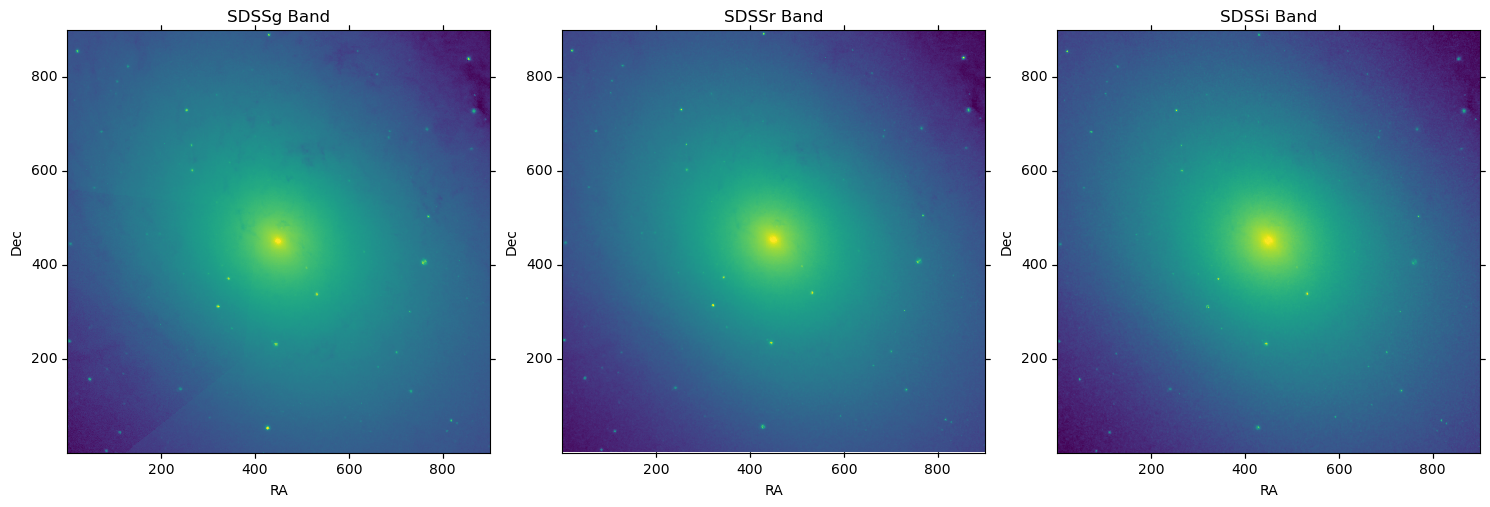

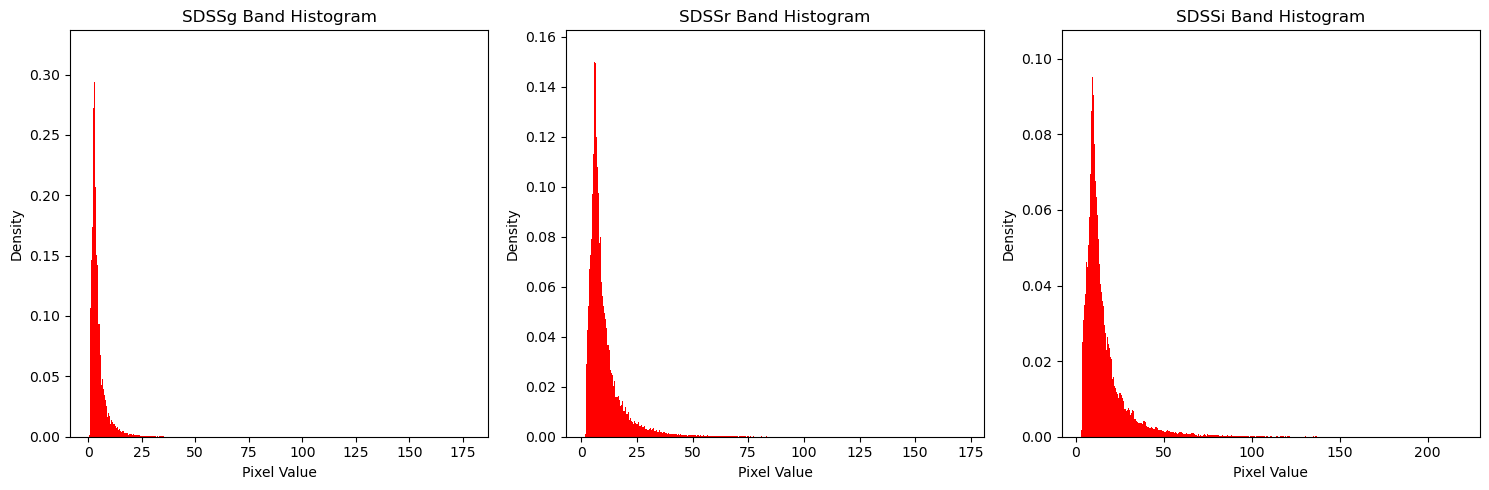

In [26]:
#SkyView kullanılarak belirli alanın görüntüsü alındı. Isı haritası ve gerekli arkaplan oynamalarının yapılabilmesi sağladı. Görüntü daha anlaşılır hale geldi ve histogram grafiği koyularak anlamlandırıldı.

coordinates = SkyCoord("00h42m44.33s", "41d16m07.5s")
bands = ['SDSSg', 'SDSSr', 'SDSSi']
images = SkyView.get_images(coordinates, survey=bands, pixels=900)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': wcs.WCS()})

for ax, image, band in zip(axs, images, bands):
    image_data = image[0].data
    vmin_percentile = np.percentile(image_data, 0.01)
    vmax_percentile = np.percentile(image_data, 99.99)
    ax.imshow(image_data, cmap='viridis', interpolation='none', origin='lower',
              norm=plt.matplotlib.colors.LogNorm(vmin=vmin_percentile, vmax=vmax_percentile))
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.set_title(f'{band} Band')
    
    print(f'Band: {band}')
    print('Min:', np.min(image_data))
    print('Max:', np.max(image_data))
    print('Mean:', np.mean(image_data))
    print('Stdev:', np.std(image_data))
    print('Histogram:')
    print(type(image_data.flatten()))
    print(image_data.flatten().shape)
    print()
    
plt.tight_layout()
plt.show()

fig_hist, axs_hist = plt.subplots(1, 3, figsize=(15, 5))

for ax_hist, image, band in zip(axs_hist, images, bands):
    image_data = image[0].data
    ax_hist.hist(image_data.flatten(), bins='auto', density=True, color='red')
    ax_hist.set_xlabel('Pixel Value')
    ax_hist.set_ylabel('Density')
    ax_hist.set_title(f'{band} Band Histogram')

plt.tight_layout()
plt.show()
